# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 

## Homework 4: CNN 

**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors:** Pavlos Protopapas, Mark Glickman, Chris Tanner<br/>

<hr style="height:2pt">

In [4]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [5]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
# Uncomment the line below to help debug if the path to included images don't show
#print(working_dir)
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- If you submit individually but you have worked with someone, please include the name of your **one** partner below.
- Please restart the kernel and run the entire notebook again before you submit. (Exception - you may skip the cells where you train neural networks, running the cells which load previously saved weights instead. However, **don't delete/overwrite the output that model.fit produced during training!**)

**Names of person you have worked with goes here:**
<br><BR>

<hr style="height:2pt">

In [6]:
import numpy as np

from PIL import Image

from matplotlib import pyplot
import matplotlib.pylab as plt 
from scipy.signal import convolve2d
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD

## Additional Packages required if you don't already have them
# While in your conda environment,

# imageio
#       Install using "conda install imageio"
# pillow
#       Install using "conda install pillow"
# tensorflow-datasets
#       Install using "conda install tensorflow-datasets"
# tf-keras-vis
#       Install using "pip install tf-keras-vis"
# tensorflow-addons
#       Install using "pip install tensorflow-addons"

<div class="theme"> Overview </div> 


In this homework, we will explore Convolutional Neural Networks (CNNs).  We'll explore the mechanics of convolutional operations and how filters can extract certain features of images, increasing in abstraction with depth. Then we will build a CNN to classify CIFAR-10 images, a standard pedagogical problem, and use saliency maps to understand what the network is paying attention to. Finally, we will see that CNNs aren't just for classifying. They can serve as image input processing for a variety of tasks, as we will show by training a network to rotate faces upright.

<div class='exercise'> <b> Question 1: Convolutional Neural Network Mechanics [10pts total] </b></div>


As you know from lecture, in convolutional neural networks, a convolution is a multiplicative operation on a local region of values. Convolutional layers have shown themselves to have been very useful in image classification, as they allows the network to retain local spatial information for feature extraction.


**1.1** Calculate Convolutions. [5pts]




For the following 2D matrix:

$$
\left( \begin{array}{cccc}
2 & 3 & 2 & 4 \\
3 & 1 & 2 & 2 \\
4 & 1 & 0 & 1 \\
7 & 2 & 1 & 3
\end{array} \right)
$$

you will use the following 2x2 filter to perform a 2D convolution operation.

$$
\left( \begin{array}{cc}
2 & 1 \\
1 & 3 
\end{array} \right)
$$

Compute this operation by hand assuming a vertical and horizontal stride of 1 as well as a) valid, b) same, and c) full padding modes. 

**You may answer question 1.1 in this markdown cell by replacing the '?' marks with the correct value.**



A) Valid

$$
\left( \begin{array}{cccc}
? & ? & ?  \\
? & ? & ?  \\
? & ? & ? 
\end{array} \right)
$$
    
B) Same padding. We will accept solutions for all combinations (top & left, top & right, bottom & left, bottom & right).

$$
\left( \begin{array}{cccc}
? & ? & ? & ? \\
? & ? & ? & ? \\
? & ? & ? & ? \\
? & ? & ? & ?
\end{array} \right)
$$

C) full padding

$$
\left( \begin{array}{cccc}
? & ? & ? & ? & ? \\
? & ? & ? & ? & ? \\
? & ? & ? & ? & ? \\
? & ? & ? & ? & ? \\
7 & ? & ? & ? & ?
\end{array} \right)
$$

**1.2** Understanding Pooling Operations. [5pts]

Pooling operations are often used in convolutional neural networks to reduce the dimensionality of the feature maps as well as overall network complexity. Two main types of pooling are used: AveragePooling and MaxPooling.

Using the matrix below, write the output of the AveragePooling and MaxPooling operations with pool size 2x2 and stride  2x2. Repeat with a stride of 1x1.

$$
\left( \begin{array}{cccc}
1 & 2 & 2 & 4 \\
3 & 1 & 2 & 1 \\
4 & 1 & 0 & 2 \\
5 & 2 & 2 & 1
\end{array} \right)
$$

**You may answer question 1.2 in this markdown cell by replacing the '?' marks with the correct value.**

**A) size 2x2 and stride 2x2**

MaxPooling:
$$
\left( \begin{array}{cccc}
? & ? \\
? & ? 
\end{array} \right)
$$
AveragePooling:
$$
\left( \begin{array}{cccc}
? & ? \\
? & ?
\end{array} \right)
$$

**B) size 2x2 and stride 1x1**

MaxPooling:
$$
\left( \begin{array}{cccc}
? & ? & ? \\
? & ? & ? \\
? & ? & ? 
\end{array} \right)
$$
AveragePooling:
$$
\left( \begin{array}{cccc}
? & ? & ? \\
? & ? & ? \\
? & ? & ?
\end{array} \right)
$$

## Answers

**1.1** Calculate Convolutions. [5pts]




For the following 2D matrix:

$$
\left( \begin{array}{cccc}
2 & 3 & 2 & 4 \\
3 & 1 & 2 & 2 \\
4 & 1 & 0 & 1 \\
7 & 2 & 1 & 3
\end{array} \right)
$$

you will use the following 2x2 filter to perform a 2D convolution operation.

$$
\left( \begin{array}{cc}
2 & 1 \\
1 & 3
\end{array} \right)
$$

Compute this operation by hand assuming a vertical and horizontal stride of 1 as well as a) valid, b) same, and c) full padding modes.



A) Valid

$$
\left( \begin{array}{cccc}
13 & 14 & 16  \\
13 & 5 & 9  \\
22 & 7 & 11 
\end{array} \right)
$$
    
B) Same padding. We will accept solutions for all combinations (top & left, top & right, bottom & left, bottom & right).

$$
\left( \begin{array}{cccc}
6 & 11 & 9 & 14 \\
11 & 13 & 14 & 16 \\
15 & 13 & 5 & 9 \\
25 & 22 & 7 & 11
\end{array} \right)
$$

C) full padding

$$
\left( \begin{array}{cccc}
6 & 11 & 9 & 14 & 4 \\
11 & 13 & 14 & 16 & 10 \\
15 & 13 & 5 & 9 & 5 \\
25 & 22 & 7 & 11 & 5 \\
7 & 16 & 6 & 5 & 6
\end{array} \right)
$$

**1.2** Understanding Pooling Operations. [5pts]

Pooling operations are often used in convolutional neural networks to reduce the dimensionality of the feature maps as well as overall network complexity. Two main types of pooling are used: AveragePooling and MaxPooling.

Using the matrix below, write the output of the AveragePooling and MaxPooling operations with pool size 2x2 and stride  2x2. Repeat with a stride of 1x1.

$$
\left( \begin{array}{cccc}
1 & 2 & 2 & 4 \\
3 & 1 & 2 & 1 \\
4 & 1 & 0 & 2 \\
5 & 2 & 2 & 1
\end{array} \right)
$$

*Your answer here*


MaxPooling:
$$
\left( \begin{array}{cccc}
3 & 4 \\
5 & 2 
\end{array} \right)
$$
AveragePooling:
$$
\left( \begin{array}{cccc}
1.75 & 2.25 \\
3 & 1.25
\end{array} \right)
$$

**B) size 2x2 and stride 1x1**

MaxPooling:
$$
\left( \begin{array}{cccc}
3 & 2 & 4 \\
4 & 2 & 2 \\
5 & 2 & 2 
\end{array} \right)
$$
AveragePooling:
$$
\left( \begin{array}{cccc}
1.75 & 1.75 & 2.25 \\
2.25 & 1 & 1.25 \\
3 & 1.25 & 1.25
\end{array} \right)
$$


<div class='exercise'> <b> Question 2: CNNs at Work [30pts total]  </b></div>

Consider the following image of Widener Library:

![Widener Library](data/Widener_Library.jpg)

**2.1** [2pts] Load the image as a 2D Numpy array into the variable `library_image_data`. Normalize the image data so that values within `library_image_data` fall within [0., 1.]. The image is located at 'data/Widener_Library.jpg'.

**2.2** Filters for image processing. [5pts] Peform sharpening and normalized box blurring using 3x3 convolution kernels (see https://en.wikipedia.org/wiki/Kernel_(image_processing) for example), and apply each of these kernels to the image (separately on each color channel) with same padding mode (you may want to implement your own convolution function or try using  [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)). Show the resulting 3-channel color images, using `np.clip()` to clip values to the range [0., 1.] for use with `imshow`.

**2.3** What a CNN sees. [5pts] Normalize `library_image_data` to the range [-0.5, 0.5], saving the resulting array to `norm_img`. Consider the following 3x3x3 kernel $A_{ijk}$ where
$$
A_{:,:,1} = A_{:,:,2} = A_{:,:,3} = \frac{1}{3} \left( \begin{array}{ccc}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1 \\
\end{array} \right),
$$
i.e. it has the same 3x3 depth slice throughout its depth (3 channels for the RGB channels of the input image). Apply $A_{ijk}$ to `norm_img` like a CNN would, using same padding mode (hint: what should the resulting shape of the feature map be?).

After the convolution part, CNNs next need an activation function. We now *rectify* the feature map by applying the ReLU activation function:

`
if x < 0:
    x = 0
else:
    x = x
`

or equivalently, $\textrm{ReLU}(x) = \textrm{max}(0,x)$ as it is often written. You can use `np.clip(x, a_min=0., a_max=None)` as a rectifier. Plot the rectified feature map using `imshow`, using the option `cmap='gray'` to produce a nice black & white image. What is this kernel doing?


**2.4** [5pts] Look up or come up with a 3x3x3 kernel for performing vertical edge detection, and another for performing horizontal edge detection. Apply the vertical edge kernel to `norm_img`, and then through a ReLU, saving the result as `vedges`. Apply the horizontal edge kernel to `norm_img`, pass it through a ReLU and save the result as `hedges`. Plot `vedges` and `hedges` with `imshow` in black & white. Don't worry too much about what kernels you end up using, or what overall normalization factor you use. As long as in the plot vertical(horizontal) edges are clearly emphasized while horizontal(vertical) edges are suppressed, you've done it correctly.

Together, `vedges` and `hedges` could be the output of the first layer of a CNN. Now we will investigate what can happen when we stack CNNs.

**2.5** [8pts] Concatenate `vedges` and `hedges` in a third dimension, calling the output `feature_map`. `feature_map` should have dimensions (267, 400, 2). Take the following 3x3x2 kernel $B_{ijk}$:

$$
B_{:,:,1} = B_{:,:,2} =  \left( \begin{array}{ccc}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array} \right),
$$
and apply it to `feature_map`. This time, before we pass it through the activation, we will add a bias. For now, start with a bias of `bias = -2`, and pass the the result through a ReLU, saving the output in variable `outmap`. Plot `outmap` in black & white. Depending on the normalization of your vertical/horizontal kernels, you will have to play with the `bias` until most of the image is black, except for some shapes that should pop out (you'll still have dots of white in other places). Now that the image has passed through 2 CNN layers, what feature(s) does this latest layer seem to be picking out? (Open-ended question, but there are wrong answers. Think about what $B_{ijk}$ is doing, in combination with the bias and rectifier)

**2.6** [5pts] Take a moment to think about the results of question 2.5. What seems to be the purpose of adding more CNN layers to increase the depth of a network? Why might it be useful to have multiple kernels/filters in a layer? Answer in 3-4 sentences.


## Answers

**2.1** [2pts] Load the image as a 2D Numpy array into the variable `library_image_data`. Normalize the image data so that values within `library_image_data` fall within [0., 1.]. The image is located at 'data/Widener_Library.jpg'.


(267, 400, 3)

[[73 82 87]
 [75 82 88]
 [20 25 31]
 ...
 [ 9 20  4]
 [27 39 19]
 [23 36 10]]
[[0.28627451 0.32156863 0.34117647]
 [0.29411765 0.32156863 0.34509804]
 [0.07843137 0.09803922 0.12156863]
 ...
 [0.03529412 0.07843137 0.01568627]
 [0.10588235 0.15294118 0.0745098 ]
 [0.09019608 0.14117647 0.03921569]]


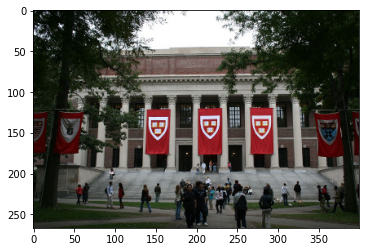

In [79]:
img = plt.imread('./data/Widener_Library.jpg')
display(img.shape)
imgplot = plt.imshow(img)

library_image_data = np.reshape(img, (1, 267, 400, 3)) # 2D array of images

print(library_image_data[0][0])
library_image_data = library_image_data/255
print(library_image_data[0][0])

**2.2** Filters for image processing. [5pts] Peform sharpening and normalized box blurring using 3x3 convolution kernels (see https://en.wikipedia.org/wiki/Kernel_(image_processing) for example), and apply each of these kernels to the image (separately on each color channel) with same padding mode (you may want to implement your own convolution function or try using  [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)). Show the resulting 3-channel color images, using `np.clip()` to clip values to the range [0., 1.] for use with `imshow`.


[array([[ 0, -1,  0],
        [-1,  5, -1],
        [ 0, -1,  0]], dtype=int32)]

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

Text(0.5, 1.0, 'box blurred')

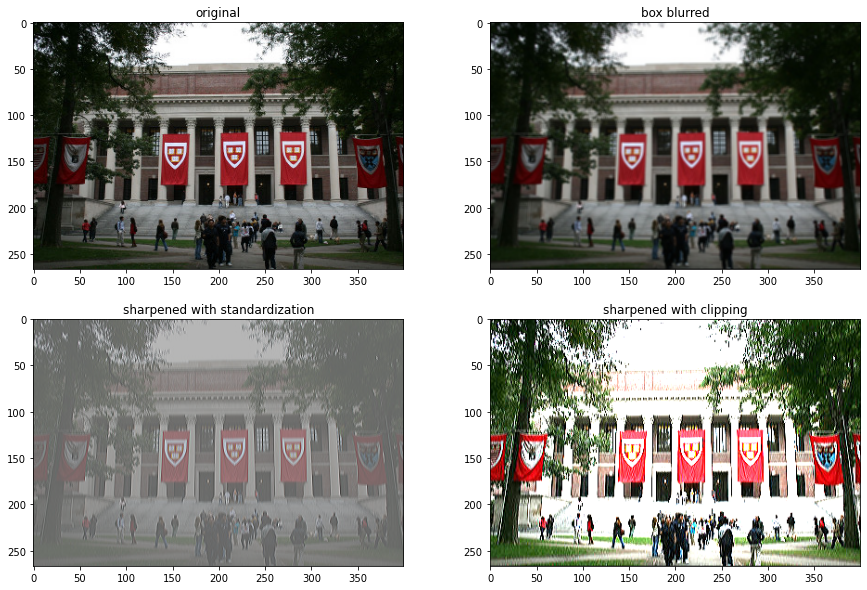

In [196]:
def standardize(np_array):
    max, min = np_array.max(), np_array.min()
    return (np_array - min)/(max - min)
    
# your code here
K_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.int32)
display([K_sharpen])
K_boxblur = np.ones(9).reshape(3, 3) * 1/9
display(K_boxblur)

padded = np.pad(library_image_data[0], ((1, 1), (1, 1), (0, 0)), 'constant', constant_values=0)

fig, ax = plt.subplots(2, 2, figsize=(15,10))

# fig.add_subplot(1, 2, 1)
ax[0][0].imshow(library_image_data[0])
ax[0][0].set_title('original')
ax[0][1].imshow(library_image_data[0])
ax[0][1].set_title('original')

for layer in range(3):
    for ix, iy in np.ndindex(library_image_data[0, :, :, layer].shape):
        transformed[ix, iy, layer] = padded[ix:ix+3, iy:iy+3, layer].dot(K_sharpen).sum()
ax[1][0].imshow(standardize(transformed))
ax[1][0].set_title('sharpened with standardization')
ax[1][1].imshow(np.clip(transformed, 0, 1))
ax[1][1].set_title('sharpened with clipping')
    
for layer in range(3):
    for ix, iy in np.ndindex(library_image_data[0, :, :, layer].shape):
        transformed[ix, iy, layer] = padded[ix:ix+3, iy:iy+3, layer].dot(K_boxblur).sum()
ax[0][1].imshow(standardize(transformed))
ax[0][1].set_title('box blurred')

In [156]:
v = np.array([[0, 1], [-1, 2]])
display(v.min())
display(v.max())


-1

2

In [77]:
for ix,iy in np.ndindex(library_image_data[0, :, :, 0].shape):
    print('{} {}'.format(ix, iy))

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


4 150
4 151
4 152
4 153
4 154
4 155
4 156
4 157
4 158
4 159
4 160
4 161
4 162
4 163
4 164
4 165
4 166
4 167
4 168
4 169
4 170
4 171
4 172
4 173
4 174
4 175
4 176
4 177
4 178
4 179
4 180
4 181
4 182
4 183
4 184
4 185
4 186
4 187
4 188
4 189
4 190
4 191
4 192
4 193
4 194
4 195
4 196
4 197
4 198
4 199
4 200
4 201
4 202
4 203
4 204
4 205
4 206
4 207
4 208
4 209
4 210
4 211
4 212
4 213
4 214
4 215
4 216
4 217
4 218
4 219
4 220
4 221
4 222
4 223
4 224
4 225
4 226
4 227
4 228
4 229
4 230
4 231
4 232
4 233
4 234
4 235
4 236
4 237
4 238
4 239
4 240
4 241
4 242
4 243
4 244
4 245
4 246
4 247
4 248
4 249
4 250
4 251
4 252
4 253
4 254
4 255
4 256
4 257
4 258
4 259
4 260
4 261
4 262
4 263
4 264
4 265
4 266
4 267
4 268
4 269
4 270
4 271
4 272
4 273
4 274
4 275
4 276
4 277
4 278
4 279
4 280
4 281
4 282
4 283
4 284
4 285
4 286
4 287
4 288
4 289
4 290
4 291
4 292
4 293
4 294
4 295
4 296
4 297
4 298
4 299
4 300
4 301
4 302
4 303
4 304
4 305
4 306
4 307
4 308
4 309
4 310
4 311
4 312
4 313
4 314
4 315
4 31

8 49
8 50
8 51
8 52
8 53
8 54
8 55
8 56
8 57
8 58
8 59
8 60
8 61
8 62
8 63
8 64
8 65
8 66
8 67
8 68
8 69
8 70
8 71
8 72
8 73
8 74
8 75
8 76
8 77
8 78
8 79
8 80
8 81
8 82
8 83
8 84
8 85
8 86
8 87
8 88
8 89
8 90
8 91
8 92
8 93
8 94
8 95
8 96
8 97
8 98
8 99
8 100
8 101
8 102
8 103
8 104
8 105
8 106
8 107
8 108
8 109
8 110
8 111
8 112
8 113
8 114
8 115
8 116
8 117
8 118
8 119
8 120
8 121
8 122
8 123
8 124
8 125
8 126
8 127
8 128
8 129
8 130
8 131
8 132
8 133
8 134
8 135
8 136
8 137
8 138
8 139
8 140
8 141
8 142
8 143
8 144
8 145
8 146
8 147
8 148
8 149
8 150
8 151
8 152
8 153
8 154
8 155
8 156
8 157
8 158
8 159
8 160
8 161
8 162
8 163
8 164
8 165
8 166
8 167
8 168
8 169
8 170
8 171
8 172
8 173
8 174
8 175
8 176
8 177
8 178
8 179
8 180
8 181
8 182
8 183
8 184
8 185
8 186
8 187
8 188
8 189
8 190
8 191
8 192
8 193
8 194
8 195
8 196
8 197
8 198
8 199
8 200
8 201
8 202
8 203
8 204
8 205
8 206
8 207
8 208
8 209
8 210
8 211
8 212
8 213
8 214
8 215
8 216
8 217
8 218
8 219
8 220
8 221
8 222
8 223
8

11 349
11 350
11 351
11 352
11 353
11 354
11 355
11 356
11 357
11 358
11 359
11 360
11 361
11 362
11 363
11 364
11 365
11 366
11 367
11 368
11 369
11 370
11 371
11 372
11 373
11 374
11 375
11 376
11 377
11 378
11 379
11 380
11 381
11 382
11 383
11 384
11 385
11 386
11 387
11 388
11 389
11 390
11 391
11 392
11 393
11 394
11 395
11 396
11 397
11 398
11 399
12 0
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
12 15
12 16
12 17
12 18
12 19
12 20
12 21
12 22
12 23
12 24
12 25
12 26
12 27
12 28
12 29
12 30
12 31
12 32
12 33
12 34
12 35
12 36
12 37
12 38
12 39
12 40
12 41
12 42
12 43
12 44
12 45
12 46
12 47
12 48
12 49
12 50
12 51
12 52
12 53
12 54
12 55
12 56
12 57
12 58
12 59
12 60
12 61
12 62
12 63
12 64
12 65
12 66
12 67
12 68
12 69
12 70
12 71
12 72
12 73
12 74
12 75
12 76
12 77
12 78
12 79
12 80
12 81
12 82
12 83
12 84
12 85
12 86
12 87
12 88
12 89
12 90
12 91
12 92
12 93
12 94
12 95
12 96
12 97
12 98
12 99
12 100
12 101
12 102
12 103
12 104
12 105
12 106
12 1

15 248
15 249
15 250
15 251
15 252
15 253
15 254
15 255
15 256
15 257
15 258
15 259
15 260
15 261
15 262
15 263
15 264
15 265
15 266
15 267
15 268
15 269
15 270
15 271
15 272
15 273
15 274
15 275
15 276
15 277
15 278
15 279
15 280
15 281
15 282
15 283
15 284
15 285
15 286
15 287
15 288
15 289
15 290
15 291
15 292
15 293
15 294
15 295
15 296
15 297
15 298
15 299
15 300
15 301
15 302
15 303
15 304
15 305
15 306
15 307
15 308
15 309
15 310
15 311
15 312
15 313
15 314
15 315
15 316
15 317
15 318
15 319
15 320
15 321
15 322
15 323
15 324
15 325
15 326
15 327
15 328
15 329
15 330
15 331
15 332
15 333
15 334
15 335
15 336
15 337
15 338
15 339
15 340
15 341
15 342
15 343
15 344
15 345
15 346
15 347
15 348
15 349
15 350
15 351
15 352
15 353
15 354
15 355
15 356
15 357
15 358
15 359
15 360
15 361
15 362
15 363
15 364
15 365
15 366
15 367
15 368
15 369
15 370
15 371
15 372
15 373
15 374
15 375
15 376
15 377
15 378
15 379
15 380
15 381
15 382
15 383
15 384
15 385
15 386
15 387
15 388
15 389
15 390

19 148
19 149
19 150
19 151
19 152
19 153
19 154
19 155
19 156
19 157
19 158
19 159
19 160
19 161
19 162
19 163
19 164
19 165
19 166
19 167
19 168
19 169
19 170
19 171
19 172
19 173
19 174
19 175
19 176
19 177
19 178
19 179
19 180
19 181
19 182
19 183
19 184
19 185
19 186
19 187
19 188
19 189
19 190
19 191
19 192
19 193
19 194
19 195
19 196
19 197
19 198
19 199
19 200
19 201
19 202
19 203
19 204
19 205
19 206
19 207
19 208
19 209
19 210
19 211
19 212
19 213
19 214
19 215
19 216
19 217
19 218
19 219
19 220
19 221
19 222
19 223
19 224
19 225
19 226
19 227
19 228
19 229
19 230
19 231
19 232
19 233
19 234
19 235
19 236
19 237
19 238
19 239
19 240
19 241
19 242
19 243
19 244
19 245
19 246
19 247
19 248
19 249
19 250
19 251
19 252
19 253
19 254
19 255
19 256
19 257
19 258
19 259
19 260
19 261
19 262
19 263
19 264
19 265
19 266
19 267
19 268
19 269
19 270
19 271
19 272
19 273
19 274
19 275
19 276
19 277
19 278
19 279
19 280
19 281
19 282
19 283
19 284
19 285
19 286
19 287
19 288
19 289
19 290

23 47
23 48
23 49
23 50
23 51
23 52
23 53
23 54
23 55
23 56
23 57
23 58
23 59
23 60
23 61
23 62
23 63
23 64
23 65
23 66
23 67
23 68
23 69
23 70
23 71
23 72
23 73
23 74
23 75
23 76
23 77
23 78
23 79
23 80
23 81
23 82
23 83
23 84
23 85
23 86
23 87
23 88
23 89
23 90
23 91
23 92
23 93
23 94
23 95
23 96
23 97
23 98
23 99
23 100
23 101
23 102
23 103
23 104
23 105
23 106
23 107
23 108
23 109
23 110
23 111
23 112
23 113
23 114
23 115
23 116
23 117
23 118
23 119
23 120
23 121
23 122
23 123
23 124
23 125
23 126
23 127
23 128
23 129
23 130
23 131
23 132
23 133
23 134
23 135
23 136
23 137
23 138
23 139
23 140
23 141
23 142
23 143
23 144
23 145
23 146
23 147
23 148
23 149
23 150
23 151
23 152
23 153
23 154
23 155
23 156
23 157
23 158
23 159
23 160
23 161
23 162
23 163
23 164
23 165
23 166
23 167
23 168
23 169
23 170
23 171
23 172
23 173
23 174
23 175
23 176
23 177
23 178
23 179
23 180
23 181
23 182
23 183
23 184
23 185
23 186
23 187
23 188
23 189
23 190
23 191
23 192
23 193
23 194
23 195
23 196
23 

26 347
26 348
26 349
26 350
26 351
26 352
26 353
26 354
26 355
26 356
26 357
26 358
26 359
26 360
26 361
26 362
26 363
26 364
26 365
26 366
26 367
26 368
26 369
26 370
26 371
26 372
26 373
26 374
26 375
26 376
26 377
26 378
26 379
26 380
26 381
26 382
26 383
26 384
26 385
26 386
26 387
26 388
26 389
26 390
26 391
26 392
26 393
26 394
26 395
26 396
26 397
26 398
26 399
27 0
27 1
27 2
27 3
27 4
27 5
27 6
27 7
27 8
27 9
27 10
27 11
27 12
27 13
27 14
27 15
27 16
27 17
27 18
27 19
27 20
27 21
27 22
27 23
27 24
27 25
27 26
27 27
27 28
27 29
27 30
27 31
27 32
27 33
27 34
27 35
27 36
27 37
27 38
27 39
27 40
27 41
27 42
27 43
27 44
27 45
27 46
27 47
27 48
27 49
27 50
27 51
27 52
27 53
27 54
27 55
27 56
27 57
27 58
27 59
27 60
27 61
27 62
27 63
27 64
27 65
27 66
27 67
27 68
27 69
27 70
27 71
27 72
27 73
27 74
27 75
27 76
27 77
27 78
27 79
27 80
27 81
27 82
27 83
27 84
27 85
27 86
27 87
27 88
27 89
27 90
27 91
27 92
27 93
27 94
27 95
27 96
27 97
27 98
27 99
27 100
27 101
27 102
27 103
27 104
27 1

30 246
30 247
30 248
30 249
30 250
30 251
30 252
30 253
30 254
30 255
30 256
30 257
30 258
30 259
30 260
30 261
30 262
30 263
30 264
30 265
30 266
30 267
30 268
30 269
30 270
30 271
30 272
30 273
30 274
30 275
30 276
30 277
30 278
30 279
30 280
30 281
30 282
30 283
30 284
30 285
30 286
30 287
30 288
30 289
30 290
30 291
30 292
30 293
30 294
30 295
30 296
30 297
30 298
30 299
30 300
30 301
30 302
30 303
30 304
30 305
30 306
30 307
30 308
30 309
30 310
30 311
30 312
30 313
30 314
30 315
30 316
30 317
30 318
30 319
30 320
30 321
30 322
30 323
30 324
30 325
30 326
30 327
30 328
30 329
30 330
30 331
30 332
30 333
30 334
30 335
30 336
30 337
30 338
30 339
30 340
30 341
30 342
30 343
30 344
30 345
30 346
30 347
30 348
30 349
30 350
30 351
30 352
30 353
30 354
30 355
30 356
30 357
30 358
30 359
30 360
30 361
30 362
30 363
30 364
30 365
30 366
30 367
30 368
30 369
30 370
30 371
30 372
30 373
30 374
30 375
30 376
30 377
30 378
30 379
30 380
30 381
30 382
30 383
30 384
30 385
30 386
30 387
30 388

34 146
34 147
34 148
34 149
34 150
34 151
34 152
34 153
34 154
34 155
34 156
34 157
34 158
34 159
34 160
34 161
34 162
34 163
34 164
34 165
34 166
34 167
34 168
34 169
34 170
34 171
34 172
34 173
34 174
34 175
34 176
34 177
34 178
34 179
34 180
34 181
34 182
34 183
34 184
34 185
34 186
34 187
34 188
34 189
34 190
34 191
34 192
34 193
34 194
34 195
34 196
34 197
34 198
34 199
34 200
34 201
34 202
34 203
34 204
34 205
34 206
34 207
34 208
34 209
34 210
34 211
34 212
34 213
34 214
34 215
34 216
34 217
34 218
34 219
34 220
34 221
34 222
34 223
34 224
34 225
34 226
34 227
34 228
34 229
34 230
34 231
34 232
34 233
34 234
34 235
34 236
34 237
34 238
34 239
34 240
34 241
34 242
34 243
34 244
34 245
34 246
34 247
34 248
34 249
34 250
34 251
34 252
34 253
34 254
34 255
34 256
34 257
34 258
34 259
34 260
34 261
34 262
34 263
34 264
34 265
34 266
34 267
34 268
34 269
34 270
34 271
34 272
34 273
34 274
34 275
34 276
34 277
34 278
34 279
34 280
34 281
34 282
34 283
34 284
34 285
34 286
34 287
34 288

38 45
38 46
38 47
38 48
38 49
38 50
38 51
38 52
38 53
38 54
38 55
38 56
38 57
38 58
38 59
38 60
38 61
38 62
38 63
38 64
38 65
38 66
38 67
38 68
38 69
38 70
38 71
38 72
38 73
38 74
38 75
38 76
38 77
38 78
38 79
38 80
38 81
38 82
38 83
38 84
38 85
38 86
38 87
38 88
38 89
38 90
38 91
38 92
38 93
38 94
38 95
38 96
38 97
38 98
38 99
38 100
38 101
38 102
38 103
38 104
38 105
38 106
38 107
38 108
38 109
38 110
38 111
38 112
38 113
38 114
38 115
38 116
38 117
38 118
38 119
38 120
38 121
38 122
38 123
38 124
38 125
38 126
38 127
38 128
38 129
38 130
38 131
38 132
38 133
38 134
38 135
38 136
38 137
38 138
38 139
38 140
38 141
38 142
38 143
38 144
38 145
38 146
38 147
38 148
38 149
38 150
38 151
38 152
38 153
38 154
38 155
38 156
38 157
38 158
38 159
38 160
38 161
38 162
38 163
38 164
38 165
38 166
38 167
38 168
38 169
38 170
38 171
38 172
38 173
38 174
38 175
38 176
38 177
38 178
38 179
38 180
38 181
38 182
38 183
38 184
38 185
38 186
38 187
38 188
38 189
38 190
38 191
38 192
38 193
38 194
38 19

41 345
41 346
41 347
41 348
41 349
41 350
41 351
41 352
41 353
41 354
41 355
41 356
41 357
41 358
41 359
41 360
41 361
41 362
41 363
41 364
41 365
41 366
41 367
41 368
41 369
41 370
41 371
41 372
41 373
41 374
41 375
41 376
41 377
41 378
41 379
41 380
41 381
41 382
41 383
41 384
41 385
41 386
41 387
41 388
41 389
41 390
41 391
41 392
41 393
41 394
41 395
41 396
41 397
41 398
41 399
42 0
42 1
42 2
42 3
42 4
42 5
42 6
42 7
42 8
42 9
42 10
42 11
42 12
42 13
42 14
42 15
42 16
42 17
42 18
42 19
42 20
42 21
42 22
42 23
42 24
42 25
42 26
42 27
42 28
42 29
42 30
42 31
42 32
42 33
42 34
42 35
42 36
42 37
42 38
42 39
42 40
42 41
42 42
42 43
42 44
42 45
42 46
42 47
42 48
42 49
42 50
42 51
42 52
42 53
42 54
42 55
42 56
42 57
42 58
42 59
42 60
42 61
42 62
42 63
42 64
42 65
42 66
42 67
42 68
42 69
42 70
42 71
42 72
42 73
42 74
42 75
42 76
42 77
42 78
42 79
42 80
42 81
42 82
42 83
42 84
42 85
42 86
42 87
42 88
42 89
42 90
42 91
42 92
42 93
42 94
42 95
42 96
42 97
42 98
42 99
42 100
42 101
42 102
42 1

45 244
45 245
45 246
45 247
45 248
45 249
45 250
45 251
45 252
45 253
45 254
45 255
45 256
45 257
45 258
45 259
45 260
45 261
45 262
45 263
45 264
45 265
45 266
45 267
45 268
45 269
45 270
45 271
45 272
45 273
45 274
45 275
45 276
45 277
45 278
45 279
45 280
45 281
45 282
45 283
45 284
45 285
45 286
45 287
45 288
45 289
45 290
45 291
45 292
45 293
45 294
45 295
45 296
45 297
45 298
45 299
45 300
45 301
45 302
45 303
45 304
45 305
45 306
45 307
45 308
45 309
45 310
45 311
45 312
45 313
45 314
45 315
45 316
45 317
45 318
45 319
45 320
45 321
45 322
45 323
45 324
45 325
45 326
45 327
45 328
45 329
45 330
45 331
45 332
45 333
45 334
45 335
45 336
45 337
45 338
45 339
45 340
45 341
45 342
45 343
45 344
45 345
45 346
45 347
45 348
45 349
45 350
45 351
45 352
45 353
45 354
45 355
45 356
45 357
45 358
45 359
45 360
45 361
45 362
45 363
45 364
45 365
45 366
45 367
45 368
45 369
45 370
45 371
45 372
45 373
45 374
45 375
45 376
45 377
45 378
45 379
45 380
45 381
45 382
45 383
45 384
45 385
45 386

49 144
49 145
49 146
49 147
49 148
49 149
49 150
49 151
49 152
49 153
49 154
49 155
49 156
49 157
49 158
49 159
49 160
49 161
49 162
49 163
49 164
49 165
49 166
49 167
49 168
49 169
49 170
49 171
49 172
49 173
49 174
49 175
49 176
49 177
49 178
49 179
49 180
49 181
49 182
49 183
49 184
49 185
49 186
49 187
49 188
49 189
49 190
49 191
49 192
49 193
49 194
49 195
49 196
49 197
49 198
49 199
49 200
49 201
49 202
49 203
49 204
49 205
49 206
49 207
49 208
49 209
49 210
49 211
49 212
49 213
49 214
49 215
49 216
49 217
49 218
49 219
49 220
49 221
49 222
49 223
49 224
49 225
49 226
49 227
49 228
49 229
49 230
49 231
49 232
49 233
49 234
49 235
49 236
49 237
49 238
49 239
49 240
49 241
49 242
49 243
49 244
49 245
49 246
49 247
49 248
49 249
49 250
49 251
49 252
49 253
49 254
49 255
49 256
49 257
49 258
49 259
49 260
49 261
49 262
49 263
49 264
49 265
49 266
49 267
49 268
49 269
49 270
49 271
49 272
49 273
49 274
49 275
49 276
49 277
49 278
49 279
49 280
49 281
49 282
49 283
49 284
49 285
49 286

53 43
53 44
53 45
53 46
53 47
53 48
53 49
53 50
53 51
53 52
53 53
53 54
53 55
53 56
53 57
53 58
53 59
53 60
53 61
53 62
53 63
53 64
53 65
53 66
53 67
53 68
53 69
53 70
53 71
53 72
53 73
53 74
53 75
53 76
53 77
53 78
53 79
53 80
53 81
53 82
53 83
53 84
53 85
53 86
53 87
53 88
53 89
53 90
53 91
53 92
53 93
53 94
53 95
53 96
53 97
53 98
53 99
53 100
53 101
53 102
53 103
53 104
53 105
53 106
53 107
53 108
53 109
53 110
53 111
53 112
53 113
53 114
53 115
53 116
53 117
53 118
53 119
53 120
53 121
53 122
53 123
53 124
53 125
53 126
53 127
53 128
53 129
53 130
53 131
53 132
53 133
53 134
53 135
53 136
53 137
53 138
53 139
53 140
53 141
53 142
53 143
53 144
53 145
53 146
53 147
53 148
53 149
53 150
53 151
53 152
53 153
53 154
53 155
53 156
53 157
53 158
53 159
53 160
53 161
53 162
53 163
53 164
53 165
53 166
53 167
53 168
53 169
53 170
53 171
53 172
53 173
53 174
53 175
53 176
53 177
53 178
53 179
53 180
53 181
53 182
53 183
53 184
53 185
53 186
53 187
53 188
53 189
53 190
53 191
53 192
53 193


56 343
56 344
56 345
56 346
56 347
56 348
56 349
56 350
56 351
56 352
56 353
56 354
56 355
56 356
56 357
56 358
56 359
56 360
56 361
56 362
56 363
56 364
56 365
56 366
56 367
56 368
56 369
56 370
56 371
56 372
56 373
56 374
56 375
56 376
56 377
56 378
56 379
56 380
56 381
56 382
56 383
56 384
56 385
56 386
56 387
56 388
56 389
56 390
56 391
56 392
56 393
56 394
56 395
56 396
56 397
56 398
56 399
57 0
57 1
57 2
57 3
57 4
57 5
57 6
57 7
57 8
57 9
57 10
57 11
57 12
57 13
57 14
57 15
57 16
57 17
57 18
57 19
57 20
57 21
57 22
57 23
57 24
57 25
57 26
57 27
57 28
57 29
57 30
57 31
57 32
57 33
57 34
57 35
57 36
57 37
57 38
57 39
57 40
57 41
57 42
57 43
57 44
57 45
57 46
57 47
57 48
57 49
57 50
57 51
57 52
57 53
57 54
57 55
57 56
57 57
57 58
57 59
57 60
57 61
57 62
57 63
57 64
57 65
57 66
57 67
57 68
57 69
57 70
57 71
57 72
57 73
57 74
57 75
57 76
57 77
57 78
57 79
57 80
57 81
57 82
57 83
57 84
57 85
57 86
57 87
57 88
57 89
57 90
57 91
57 92
57 93
57 94
57 95
57 96
57 97
57 98
57 99
57 100
57 1

60 189
60 190
60 191
60 192
60 193
60 194
60 195
60 196
60 197
60 198
60 199
60 200
60 201
60 202
60 203
60 204
60 205
60 206
60 207
60 208
60 209
60 210
60 211
60 212
60 213
60 214
60 215
60 216
60 217
60 218
60 219
60 220
60 221
60 222
60 223
60 224
60 225
60 226
60 227
60 228
60 229
60 230
60 231
60 232
60 233
60 234
60 235
60 236
60 237
60 238
60 239
60 240
60 241
60 242
60 243
60 244
60 245
60 246
60 247
60 248
60 249
60 250
60 251
60 252
60 253
60 254
60 255
60 256
60 257
60 258
60 259
60 260
60 261
60 262
60 263
60 264
60 265
60 266
60 267
60 268
60 269
60 270
60 271
60 272
60 273
60 274
60 275
60 276
60 277
60 278
60 279
60 280
60 281
60 282
60 283
60 284
60 285
60 286
60 287
60 288
60 289
60 290
60 291
60 292
60 293
60 294
60 295
60 296
60 297
60 298
60 299
60 300
60 301
60 302
60 303
60 304
60 305
60 306
60 307
60 308
60 309
60 310
60 311
60 312
60 313
60 314
60 315
60 316
60 317
60 318
60 319
60 320
60 321
60 322
60 323
60 324
60 325
60 326
60 327
60 328
60 329
60 330
60 331

63 339
63 340
63 341
63 342
63 343
63 344
63 345
63 346
63 347
63 348
63 349
63 350
63 351
63 352
63 353
63 354
63 355
63 356
63 357
63 358
63 359
63 360
63 361
63 362
63 363
63 364
63 365
63 366
63 367
63 368
63 369
63 370
63 371
63 372
63 373
63 374
63 375
63 376
63 377
63 378
63 379
63 380
63 381
63 382
63 383
63 384
63 385
63 386
63 387
63 388
63 389
63 390
63 391
63 392
63 393
63 394
63 395
63 396
63 397
63 398
63 399
64 0
64 1
64 2
64 3
64 4
64 5
64 6
64 7
64 8
64 9
64 10
64 11
64 12
64 13
64 14
64 15
64 16
64 17
64 18
64 19
64 20
64 21
64 22
64 23
64 24
64 25
64 26
64 27
64 28
64 29
64 30
64 31
64 32
64 33
64 34
64 35
64 36
64 37
64 38
64 39
64 40
64 41
64 42
64 43
64 44
64 45
64 46
64 47
64 48
64 49
64 50
64 51
64 52
64 53
64 54
64 55
64 56
64 57
64 58
64 59
64 60
64 61
64 62
64 63
64 64
64 65
64 66
64 67
64 68
64 69
64 70
64 71
64 72
64 73
64 74
64 75
64 76
64 77
64 78
64 79
64 80
64 81
64 82
64 83
64 84
64 85
64 86
64 87
64 88
64 89
64 90
64 91
64 92
64 93
64 94
64 95
64 96
6

69 244
69 245
69 246
69 247
69 248
69 249
69 250
69 251
69 252
69 253
69 254
69 255
69 256
69 257
69 258
69 259
69 260
69 261
69 262
69 263
69 264
69 265
69 266
69 267
69 268
69 269
69 270
69 271
69 272
69 273
69 274
69 275
69 276
69 277
69 278
69 279
69 280
69 281
69 282
69 283
69 284
69 285
69 286
69 287
69 288
69 289
69 290
69 291
69 292
69 293
69 294
69 295
69 296
69 297
69 298
69 299
69 300
69 301
69 302
69 303
69 304
69 305
69 306
69 307
69 308
69 309
69 310
69 311
69 312
69 313
69 314
69 315
69 316
69 317
69 318
69 319
69 320
69 321
69 322
69 323
69 324
69 325
69 326
69 327
69 328
69 329
69 330
69 331
69 332
69 333
69 334
69 335
69 336
69 337
69 338
69 339
69 340
69 341
69 342
69 343
69 344
69 345
69 346
69 347
69 348
69 349
69 350
69 351
69 352
69 353
69 354
69 355
69 356
69 357
69 358
69 359
69 360
69 361
69 362
69 363
69 364
69 365
69 366
69 367
69 368
69 369
69 370
69 371
69 372
69 373
69 374
69 375
69 376
69 377
69 378
69 379
69 380
69 381
69 382
69 383
69 384
69 385
69 386

73 394
73 395
73 396
73 397
73 398
73 399
74 0
74 1
74 2
74 3
74 4
74 5
74 6
74 7
74 8
74 9
74 10
74 11
74 12
74 13
74 14
74 15
74 16
74 17
74 18
74 19
74 20
74 21
74 22
74 23
74 24
74 25
74 26
74 27
74 28
74 29
74 30
74 31
74 32
74 33
74 34
74 35
74 36
74 37
74 38
74 39
74 40
74 41
74 42
74 43
74 44
74 45
74 46
74 47
74 48
74 49
74 50
74 51
74 52
74 53
74 54
74 55
74 56
74 57
74 58
74 59
74 60
74 61
74 62
74 63
74 64
74 65
74 66
74 67
74 68
74 69
74 70
74 71
74 72
74 73
74 74
74 75
74 76
74 77
74 78
74 79
74 80
74 81
74 82
74 83
74 84
74 85
74 86
74 87
74 88
74 89
74 90
74 91
74 92
74 93
74 94
74 95
74 96
74 97
74 98
74 99
74 100
74 101
74 102
74 103
74 104
74 105
74 106
74 107
74 108
74 109
74 110
74 111
74 112
74 113
74 114
74 115
74 116
74 117
74 118
74 119
74 120
74 121
74 122
74 123
74 124
74 125
74 126
74 127
74 128
74 129
74 130
74 131
74 132
74 133
74 134
74 135
74 136
74 137
74 138
74 139
74 140
74 141
74 142
74 143
74 144
74 145
74 146
74 147
74 148
74 149
74 150
74 151
74 1

77 274
77 275
77 276
77 277
77 278
77 279
77 280
77 281
77 282
77 283
77 284
77 285
77 286
77 287
77 288
77 289
77 290
77 291
77 292
77 293
77 294
77 295
77 296
77 297
77 298
77 299
77 300
77 301
77 302
77 303
77 304
77 305
77 306
77 307
77 308
77 309
77 310
77 311
77 312
77 313
77 314
77 315
77 316
77 317
77 318
77 319
77 320
77 321
77 322
77 323
77 324
77 325
77 326
77 327
77 328
77 329
77 330
77 331
77 332
77 333
77 334
77 335
77 336
77 337
77 338
77 339
77 340
77 341
77 342
77 343
77 344
77 345
77 346
77 347
77 348
77 349
77 350
77 351
77 352
77 353
77 354
77 355
77 356
77 357
77 358
77 359
77 360
77 361
77 362
77 363
77 364
77 365
77 366
77 367
77 368
77 369
77 370
77 371
77 372
77 373
77 374
77 375
77 376
77 377
77 378
77 379
77 380
77 381
77 382
77 383
77 384
77 385
77 386
77 387
77 388
77 389
77 390
77 391
77 392
77 393
77 394
77 395
77 396
77 397
77 398
77 399
78 0
78 1
78 2
78 3
78 4
78 5
78 6
78 7
78 8
78 9
78 10
78 11
78 12
78 13
78 14
78 15
78 16
78 17
78 18
78 19
78 20
78

84 139
84 140
84 141
84 142
84 143
84 144
84 145
84 146
84 147
84 148
84 149
84 150
84 151
84 152
84 153
84 154
84 155
84 156
84 157
84 158
84 159
84 160
84 161
84 162
84 163
84 164
84 165
84 166
84 167
84 168
84 169
84 170
84 171
84 172
84 173
84 174
84 175
84 176
84 177
84 178
84 179
84 180
84 181
84 182
84 183
84 184
84 185
84 186
84 187
84 188
84 189
84 190
84 191
84 192
84 193
84 194
84 195
84 196
84 197
84 198
84 199
84 200
84 201
84 202
84 203
84 204
84 205
84 206
84 207
84 208
84 209
84 210
84 211
84 212
84 213
84 214
84 215
84 216
84 217
84 218
84 219
84 220
84 221
84 222
84 223
84 224
84 225
84 226
84 227
84 228
84 229
84 230
84 231
84 232
84 233
84 234
84 235
84 236
84 237
84 238
84 239
84 240
84 241
84 242
84 243
84 244
84 245
84 246
84 247
84 248
84 249
84 250
84 251
84 252
84 253
84 254
84 255
84 256
84 257
84 258
84 259
84 260
84 261
84 262
84 263
84 264
84 265
84 266
84 267
84 268
84 269
84 270
84 271
84 272
84 273
84 274
84 275
84 276
84 277
84 278
84 279
84 280
84 281

88 38
88 39
88 40
88 41
88 42
88 43
88 44
88 45
88 46
88 47
88 48
88 49
88 50
88 51
88 52
88 53
88 54
88 55
88 56
88 57
88 58
88 59
88 60
88 61
88 62
88 63
88 64
88 65
88 66
88 67
88 68
88 69
88 70
88 71
88 72
88 73
88 74
88 75
88 76
88 77
88 78
88 79
88 80
88 81
88 82
88 83
88 84
88 85
88 86
88 87
88 88
88 89
88 90
88 91
88 92
88 93
88 94
88 95
88 96
88 97
88 98
88 99
88 100
88 101
88 102
88 103
88 104
88 105
88 106
88 107
88 108
88 109
88 110
88 111
88 112
88 113
88 114
88 115
88 116
88 117
88 118
88 119
88 120
88 121
88 122
88 123
88 124
88 125
88 126
88 127
88 128
88 129
88 130
88 131
88 132
88 133
88 134
88 135
88 136
88 137
88 138
88 139
88 140
88 141
88 142
88 143
88 144
88 145
88 146
88 147
88 148
88 149
88 150
88 151
88 152
88 153
88 154
88 155
88 156
88 157
88 158
88 159
88 160
88 161
88 162
88 163
88 164
88 165
88 166
88 167
88 168
88 169
88 170
88 171
88 172
88 173
88 174
88 175
88 176
88 177
88 178
88 179
88 180
88 181
88 182
88 183
88 184
88 185
88 186
88 187
88 188
88 18

91 61
91 62
91 63
91 64
91 65
91 66
91 67
91 68
91 69
91 70
91 71
91 72
91 73
91 74
91 75
91 76
91 77
91 78
91 79
91 80
91 81
91 82
91 83
91 84
91 85
91 86
91 87
91 88
91 89
91 90
91 91
91 92
91 93
91 94
91 95
91 96
91 97
91 98
91 99
91 100
91 101
91 102
91 103
91 104
91 105
91 106
91 107
91 108
91 109
91 110
91 111
91 112
91 113
91 114
91 115
91 116
91 117
91 118
91 119
91 120
91 121
91 122
91 123
91 124
91 125
91 126
91 127
91 128
91 129
91 130
91 131
91 132
91 133
91 134
91 135
91 136
91 137
91 138
91 139
91 140
91 141
91 142
91 143
91 144
91 145
91 146
91 147
91 148
91 149
91 150
91 151
91 152
91 153
91 154
91 155
91 156
91 157
91 158
91 159
91 160
91 161
91 162
91 163
91 164
91 165
91 166
91 167
91 168
91 169
91 170
91 171
91 172
91 173
91 174
91 175
91 176
91 177
91 178
91 179
91 180
91 181
91 182
91 183
91 184
91 185
91 186
91 187
91 188
91 189
91 190
91 191
91 192
91 193
91 194
91 195
91 196
91 197
91 198
91 199
91 200
91 201
91 202
91 203
91 204
91 205
91 206
91 207
91 208
91 

95 237
95 238
95 239
95 240
95 241
95 242
95 243
95 244
95 245
95 246
95 247
95 248
95 249
95 250
95 251
95 252
95 253
95 254
95 255
95 256
95 257
95 258
95 259
95 260
95 261
95 262
95 263
95 264
95 265
95 266
95 267
95 268
95 269
95 270
95 271
95 272
95 273
95 274
95 275
95 276
95 277
95 278
95 279
95 280
95 281
95 282
95 283
95 284
95 285
95 286
95 287
95 288
95 289
95 290
95 291
95 292
95 293
95 294
95 295
95 296
95 297
95 298
95 299
95 300
95 301
95 302
95 303
95 304
95 305
95 306
95 307
95 308
95 309
95 310
95 311
95 312
95 313
95 314
95 315
95 316
95 317
95 318
95 319
95 320
95 321
95 322
95 323
95 324
95 325
95 326
95 327
95 328
95 329
95 330
95 331
95 332
95 333
95 334
95 335
95 336
95 337
95 338
95 339
95 340
95 341
95 342
95 343
95 344
95 345
95 346
95 347
95 348
95 349
95 350
95 351
95 352
95 353
95 354
95 355
95 356
95 357
95 358
95 359
95 360
95 361
95 362
95 363
95 364
95 365
95 366
95 367
95 368
95 369
95 370
95 371
95 372
95 373
95 374
95 375
95 376
95 377
95 378
95 379

99 137
99 138
99 139
99 140
99 141
99 142
99 143
99 144
99 145
99 146
99 147
99 148
99 149
99 150
99 151
99 152
99 153
99 154
99 155
99 156
99 157
99 158
99 159
99 160
99 161
99 162
99 163
99 164
99 165
99 166
99 167
99 168
99 169
99 170
99 171
99 172
99 173
99 174
99 175
99 176
99 177
99 178
99 179
99 180
99 181
99 182
99 183
99 184
99 185
99 186
99 187
99 188
99 189
99 190
99 191
99 192
99 193
99 194
99 195
99 196
99 197
99 198
99 199
99 200
99 201
99 202
99 203
99 204
99 205
99 206
99 207
99 208
99 209
99 210
99 211
99 212
99 213
99 214
99 215
99 216
99 217
99 218
99 219
99 220
99 221
99 222
99 223
99 224
99 225
99 226
99 227
99 228
99 229
99 230
99 231
99 232
99 233
99 234
99 235
99 236
99 237
99 238
99 239
99 240
99 241
99 242
99 243
99 244
99 245
99 246
99 247
99 248
99 249
99 250
99 251
99 252
99 253
99 254
99 255
99 256
99 257
99 258
99 259
99 260
99 261
99 262
99 263
99 264
99 265
99 266
99 267
99 268
99 269
99 270
99 271
99 272
99 273
99 274
99 275
99 276
99 277
99 278
99 279

102 106
102 107
102 108
102 109
102 110
102 111
102 112
102 113
102 114
102 115
102 116
102 117
102 118
102 119
102 120
102 121
102 122
102 123
102 124
102 125
102 126
102 127
102 128
102 129
102 130
102 131
102 132
102 133
102 134
102 135
102 136
102 137
102 138
102 139
102 140
102 141
102 142
102 143
102 144
102 145
102 146
102 147
102 148
102 149
102 150
102 151
102 152
102 153
102 154
102 155
102 156
102 157
102 158
102 159
102 160
102 161
102 162
102 163
102 164
102 165
102 166
102 167
102 168
102 169
102 170
102 171
102 172
102 173
102 174
102 175
102 176
102 177
102 178
102 179
102 180
102 181
102 182
102 183
102 184
102 185
102 186
102 187
102 188
102 189
102 190
102 191
102 192
102 193
102 194
102 195
102 196
102 197
102 198
102 199
102 200
102 201
102 202
102 203
102 204
102 205
102 206
102 207
102 208
102 209
102 210
102 211
102 212
102 213
102 214
102 215
102 216
102 217
102 218
102 219
102 220
102 221
102 222
102 223
102 224
102 225
102 226
102 227
102 228
102 229
102 230


106 336
106 337
106 338
106 339
106 340
106 341
106 342
106 343
106 344
106 345
106 346
106 347
106 348
106 349
106 350
106 351
106 352
106 353
106 354
106 355
106 356
106 357
106 358
106 359
106 360
106 361
106 362
106 363
106 364
106 365
106 366
106 367
106 368
106 369
106 370
106 371
106 372
106 373
106 374
106 375
106 376
106 377
106 378
106 379
106 380
106 381
106 382
106 383
106 384
106 385
106 386
106 387
106 388
106 389
106 390
106 391
106 392
106 393
106 394
106 395
106 396
106 397
106 398
106 399
107 0
107 1
107 2
107 3
107 4
107 5
107 6
107 7
107 8
107 9
107 10
107 11
107 12
107 13
107 14
107 15
107 16
107 17
107 18
107 19
107 20
107 21
107 22
107 23
107 24
107 25
107 26
107 27
107 28
107 29
107 30
107 31
107 32
107 33
107 34
107 35
107 36
107 37
107 38
107 39
107 40
107 41
107 42
107 43
107 44
107 45
107 46
107 47
107 48
107 49
107 50
107 51
107 52
107 53
107 54
107 55
107 56
107 57
107 58
107 59
107 60
107 61
107 62
107 63
107 64
107 65
107 66
107 67
107 68
107 69
107 70
1

109 245
109 246
109 247
109 248
109 249
109 250
109 251
109 252
109 253
109 254
109 255
109 256
109 257
109 258
109 259
109 260
109 261
109 262
109 263
109 264
109 265
109 266
109 267
109 268
109 269
109 270
109 271
109 272
109 273
109 274
109 275
109 276
109 277
109 278
109 279
109 280
109 281
109 282
109 283
109 284
109 285
109 286
109 287
109 288
109 289
109 290
109 291
109 292
109 293
109 294
109 295
109 296
109 297
109 298
109 299
109 300
109 301
109 302
109 303
109 304
109 305
109 306
109 307
109 308
109 309
109 310
109 311
109 312
109 313
109 314
109 315
109 316
109 317
109 318
109 319
109 320
109 321
109 322
109 323
109 324
109 325
109 326
109 327
109 328
109 329
109 330
109 331
109 332
109 333
109 334
109 335
109 336
109 337
109 338
109 339
109 340
109 341
109 342
109 343
109 344
109 345
109 346
109 347
109 348
109 349
109 350
109 351
109 352
109 353
109 354
109 355
109 356
109 357
109 358
109 359
109 360
109 361
109 362
109 363
109 364
109 365
109 366
109 367
109 368
109 369


113 35
113 36
113 37
113 38
113 39
113 40
113 41
113 42
113 43
113 44
113 45
113 46
113 47
113 48
113 49
113 50
113 51
113 52
113 53
113 54
113 55
113 56
113 57
113 58
113 59
113 60
113 61
113 62
113 63
113 64
113 65
113 66
113 67
113 68
113 69
113 70
113 71
113 72
113 73
113 74
113 75
113 76
113 77
113 78
113 79
113 80
113 81
113 82
113 83
113 84
113 85
113 86
113 87
113 88
113 89
113 90
113 91
113 92
113 93
113 94
113 95
113 96
113 97
113 98
113 99
113 100
113 101
113 102
113 103
113 104
113 105
113 106
113 107
113 108
113 109
113 110
113 111
113 112
113 113
113 114
113 115
113 116
113 117
113 118
113 119
113 120
113 121
113 122
113 123
113 124
113 125
113 126
113 127
113 128
113 129
113 130
113 131
113 132
113 133
113 134
113 135
113 136
113 137
113 138
113 139
113 140
113 141
113 142
113 143
113 144
113 145
113 146
113 147
113 148
113 149
113 150
113 151
113 152
113 153
113 154
113 155
113 156
113 157
113 158
113 159
113 160
113 161
113 162
113 163
113 164
113 165
113 166
113 167
1

116 334
116 335
116 336
116 337
116 338
116 339
116 340
116 341
116 342
116 343
116 344
116 345
116 346
116 347
116 348
116 349
116 350
116 351
116 352
116 353
116 354
116 355
116 356
116 357
116 358
116 359
116 360
116 361
116 362
116 363
116 364
116 365
116 366
116 367
116 368
116 369
116 370
116 371
116 372
116 373
116 374
116 375
116 376
116 377
116 378
116 379
116 380
116 381
116 382
116 383
116 384
116 385
116 386
116 387
116 388
116 389
116 390
116 391
116 392
116 393
116 394
116 395
116 396
116 397
116 398
116 399
117 0
117 1
117 2
117 3
117 4
117 5
117 6
117 7
117 8
117 9
117 10
117 11
117 12
117 13
117 14
117 15
117 16
117 17
117 18
117 19
117 20
117 21
117 22
117 23
117 24
117 25
117 26
117 27
117 28
117 29
117 30
117 31
117 32
117 33
117 34
117 35
117 36
117 37
117 38
117 39
117 40
117 41
117 42
117 43
117 44
117 45
117 46
117 47
117 48
117 49
117 50
117 51
117 52
117 53
117 54
117 55
117 56
117 57
117 58
117 59
117 60
117 61
117 62
117 63
117 64
117 65
117 66
117 67
117 68

120 234
120 235
120 236
120 237
120 238
120 239
120 240
120 241
120 242
120 243
120 244
120 245
120 246
120 247
120 248
120 249
120 250
120 251
120 252
120 253
120 254
120 255
120 256
120 257
120 258
120 259
120 260
120 261
120 262
120 263
120 264
120 265
120 266
120 267
120 268
120 269
120 270
120 271
120 272
120 273
120 274
120 275
120 276
120 277
120 278
120 279
120 280
120 281
120 282
120 283
120 284
120 285
120 286
120 287
120 288
120 289
120 290
120 291
120 292
120 293
120 294
120 295
120 296
120 297
120 298
120 299
120 300
120 301
120 302
120 303
120 304
120 305
120 306
120 307
120 308
120 309
120 310
120 311
120 312
120 313
120 314
120 315
120 316
120 317
120 318
120 319
120 320
120 321
120 322
120 323
120 324
120 325
120 326
120 327
120 328
120 329
120 330
120 331
120 332
120 333
120 334
120 335
120 336
120 337
120 338
120 339
120 340
120 341
120 342
120 343
120 344
120 345
120 346
120 347
120 348
120 349
120 350
120 351
120 352
120 353
120 354
120 355
120 356
120 357
120 358


124 133
124 134
124 135
124 136
124 137
124 138
124 139
124 140
124 141
124 142
124 143
124 144
124 145
124 146
124 147
124 148
124 149
124 150
124 151
124 152
124 153
124 154
124 155
124 156
124 157
124 158
124 159
124 160
124 161
124 162
124 163
124 164
124 165
124 166
124 167
124 168
124 169
124 170
124 171
124 172
124 173
124 174
124 175
124 176
124 177
124 178
124 179
124 180
124 181
124 182
124 183
124 184
124 185
124 186
124 187
124 188
124 189
124 190
124 191
124 192
124 193
124 194
124 195
124 196
124 197
124 198
124 199
124 200
124 201
124 202
124 203
124 204
124 205
124 206
124 207
124 208
124 209
124 210
124 211
124 212
124 213
124 214
124 215
124 216
124 217
124 218
124 219
124 220
124 221
124 222
124 223
124 224
124 225
124 226
124 227
124 228
124 229
124 230
124 231
124 232
124 233
124 234
124 235
124 236
124 237
124 238
124 239
124 240
124 241
124 242
124 243
124 244
124 245
124 246
124 247
124 248
124 249
124 250
124 251
124 252
124 253
124 254
124 255
124 256
124 257


128 33
128 34
128 35
128 36
128 37
128 38
128 39
128 40
128 41
128 42
128 43
128 44
128 45
128 46
128 47
128 48
128 49
128 50
128 51
128 52
128 53
128 54
128 55
128 56
128 57
128 58
128 59
128 60
128 61
128 62
128 63
128 64
128 65
128 66
128 67
128 68
128 69
128 70
128 71
128 72
128 73
128 74
128 75
128 76
128 77
128 78
128 79
128 80
128 81
128 82
128 83
128 84
128 85
128 86
128 87
128 88
128 89
128 90
128 91
128 92
128 93
128 94
128 95
128 96
128 97
128 98
128 99
128 100
128 101
128 102
128 103
128 104
128 105
128 106
128 107
128 108
128 109
128 110
128 111
128 112
128 113
128 114
128 115
128 116
128 117
128 118
128 119
128 120
128 121
128 122
128 123
128 124
128 125
128 126
128 127
128 128
128 129
128 130
128 131
128 132
128 133
128 134
128 135
128 136
128 137
128 138
128 139
128 140
128 141
128 142
128 143
128 144
128 145
128 146
128 147
128 148
128 149
128 150
128 151
128 152
128 153
128 154
128 155
128 156
128 157
128 158
128 159
128 160
128 161
128 162
128 163
128 164
128 165
128

131 332
131 333
131 334
131 335
131 336
131 337
131 338
131 339
131 340
131 341
131 342
131 343
131 344
131 345
131 346
131 347
131 348
131 349
131 350
131 351
131 352
131 353
131 354
131 355
131 356
131 357
131 358
131 359
131 360
131 361
131 362
131 363
131 364
131 365
131 366
131 367
131 368
131 369
131 370
131 371
131 372
131 373
131 374
131 375
131 376
131 377
131 378
131 379
131 380
131 381
131 382
131 383
131 384
131 385
131 386
131 387
131 388
131 389
131 390
131 391
131 392
131 393
131 394
131 395
131 396
131 397
131 398
131 399
132 0
132 1
132 2
132 3
132 4
132 5
132 6
132 7
132 8
132 9
132 10
132 11
132 12
132 13
132 14
132 15
132 16
132 17
132 18
132 19
132 20
132 21
132 22
132 23
132 24
132 25
132 26
132 27
132 28
132 29
132 30
132 31
132 32
132 33
132 34
132 35
132 36
132 37
132 38
132 39
132 40
132 41
132 42
132 43
132 44
132 45
132 46
132 47
132 48
132 49
132 50
132 51
132 52
132 53
132 54
132 55
132 56
132 57
132 58
132 59
132 60
132 61
132 62
132 63
132 64
132 65
132 

135 232
135 233
135 234
135 235
135 236
135 237
135 238
135 239
135 240
135 241
135 242
135 243
135 244
135 245
135 246
135 247
135 248
135 249
135 250
135 251
135 252
135 253
135 254
135 255
135 256
135 257
135 258
135 259
135 260
135 261
135 262
135 263
135 264
135 265
135 266
135 267
135 268
135 269
135 270
135 271
135 272
135 273
135 274
135 275
135 276
135 277
135 278
135 279
135 280
135 281
135 282
135 283
135 284
135 285
135 286
135 287
135 288
135 289
135 290
135 291
135 292
135 293
135 294
135 295
135 296
135 297
135 298
135 299
135 300
135 301
135 302
135 303
135 304
135 305
135 306
135 307
135 308
135 309
135 310
135 311
135 312
135 313
135 314
135 315
135 316
135 317
135 318
135 319
135 320
135 321
135 322
135 323
135 324
135 325
135 326
135 327
135 328
135 329
135 330
135 331
135 332
135 333
135 334
135 335
135 336
135 337
135 338
135 339
135 340
135 341
135 342
135 343
135 344
135 345
135 346
135 347
135 348
135 349
135 350
135 351
135 352
135 353
135 354
135 355
135 356


139 131
139 132
139 133
139 134
139 135
139 136
139 137
139 138
139 139
139 140
139 141
139 142
139 143
139 144
139 145
139 146
139 147
139 148
139 149
139 150
139 151
139 152
139 153
139 154
139 155
139 156
139 157
139 158
139 159
139 160
139 161
139 162
139 163
139 164
139 165
139 166
139 167
139 168
139 169
139 170
139 171
139 172
139 173
139 174
139 175
139 176
139 177
139 178
139 179
139 180
139 181
139 182
139 183
139 184
139 185
139 186
139 187
139 188
139 189
139 190
139 191
139 192
139 193
139 194
139 195
139 196
139 197
139 198
139 199
139 200
139 201
139 202
139 203
139 204
139 205
139 206
139 207
139 208
139 209
139 210
139 211
139 212
139 213
139 214
139 215
139 216
139 217
139 218
139 219
139 220
139 221
139 222
139 223
139 224
139 225
139 226
139 227
139 228
139 229
139 230
139 231
139 232
139 233
139 234
139 235
139 236
139 237
139 238
139 239
139 240
139 241
139 242
139 243
139 244
139 245
139 246
139 247
139 248
139 249
139 250
139 251
139 252
139 253
139 254
139 255


143 31
143 32
143 33
143 34
143 35
143 36
143 37
143 38
143 39
143 40
143 41
143 42
143 43
143 44
143 45
143 46
143 47
143 48
143 49
143 50
143 51
143 52
143 53
143 54
143 55
143 56
143 57
143 58
143 59
143 60
143 61
143 62
143 63
143 64
143 65
143 66
143 67
143 68
143 69
143 70
143 71
143 72
143 73
143 74
143 75
143 76
143 77
143 78
143 79
143 80
143 81
143 82
143 83
143 84
143 85
143 86
143 87
143 88
143 89
143 90
143 91
143 92
143 93
143 94
143 95
143 96
143 97
143 98
143 99
143 100
143 101
143 102
143 103
143 104
143 105
143 106
143 107
143 108
143 109
143 110
143 111
143 112
143 113
143 114
143 115
143 116
143 117
143 118
143 119
143 120
143 121
143 122
143 123
143 124
143 125
143 126
143 127
143 128
143 129
143 130
143 131
143 132
143 133
143 134
143 135
143 136
143 137
143 138
143 139
143 140
143 141
143 142
143 143
143 144
143 145
143 146
143 147
143 148
143 149
143 150
143 151
143 152
143 153
143 154
143 155
143 156
143 157
143 158
143 159
143 160
143 161
143 162
143 163
143 1

146 330
146 331
146 332
146 333
146 334
146 335
146 336
146 337
146 338
146 339
146 340
146 341
146 342
146 343
146 344
146 345
146 346
146 347
146 348
146 349
146 350
146 351
146 352
146 353
146 354
146 355
146 356
146 357
146 358
146 359
146 360
146 361
146 362
146 363
146 364
146 365
146 366
146 367
146 368
146 369
146 370
146 371
146 372
146 373
146 374
146 375
146 376
146 377
146 378
146 379
146 380
146 381
146 382
146 383
146 384
146 385
146 386
146 387
146 388
146 389
146 390
146 391
146 392
146 393
146 394
146 395
146 396
146 397
146 398
146 399
147 0
147 1
147 2
147 3
147 4
147 5
147 6
147 7
147 8
147 9
147 10
147 11
147 12
147 13
147 14
147 15
147 16
147 17
147 18
147 19
147 20
147 21
147 22
147 23
147 24
147 25
147 26
147 27
147 28
147 29
147 30
147 31
147 32
147 33
147 34
147 35
147 36
147 37
147 38
147 39
147 40
147 41
147 42
147 43
147 44
147 45
147 46
147 47
147 48
147 49
147 50
147 51
147 52
147 53
147 54
147 55
147 56
147 57
147 58
147 59
147 60
147 61
147 62
147 63
14

150 230
150 231
150 232
150 233
150 234
150 235
150 236
150 237
150 238
150 239
150 240
150 241
150 242
150 243
150 244
150 245
150 246
150 247
150 248
150 249
150 250
150 251
150 252
150 253
150 254
150 255
150 256
150 257
150 258
150 259
150 260
150 261
150 262
150 263
150 264
150 265
150 266
150 267
150 268
150 269
150 270
150 271
150 272
150 273
150 274
150 275
150 276
150 277
150 278
150 279
150 280
150 281
150 282
150 283
150 284
150 285
150 286
150 287
150 288
150 289
150 290
150 291
150 292
150 293
150 294
150 295
150 296
150 297
150 298
150 299
150 300
150 301
150 302
150 303
150 304
150 305
150 306
150 307
150 308
150 309
150 310
150 311
150 312
150 313
150 314
150 315
150 316
150 317
150 318
150 319
150 320
150 321
150 322
150 323
150 324
150 325
150 326
150 327
150 328
150 329
150 330
150 331
150 332
150 333
150 334
150 335
150 336
150 337
150 338
150 339
150 340
150 341
150 342
150 343
150 344
150 345
150 346
150 347
150 348
150 349
150 350
150 351
150 352
150 353
150 354


154 129
154 130
154 131
154 132
154 133
154 134
154 135
154 136
154 137
154 138
154 139
154 140
154 141
154 142
154 143
154 144
154 145
154 146
154 147
154 148
154 149
154 150
154 151
154 152
154 153
154 154
154 155
154 156
154 157
154 158
154 159
154 160
154 161
154 162
154 163
154 164
154 165
154 166
154 167
154 168
154 169
154 170
154 171
154 172
154 173
154 174
154 175
154 176
154 177
154 178
154 179
154 180
154 181
154 182
154 183
154 184
154 185
154 186
154 187
154 188
154 189
154 190
154 191
154 192
154 193
154 194
154 195
154 196
154 197
154 198
154 199
154 200
154 201
154 202
154 203
154 204
154 205
154 206
154 207
154 208
154 209
154 210
154 211
154 212
154 213
154 214
154 215
154 216
154 217
154 218
154 219
154 220
154 221
154 222
154 223
154 224
154 225
154 226
154 227
154 228
154 229
154 230
154 231
154 232
154 233
154 234
154 235
154 236
154 237
154 238
154 239
154 240
154 241
154 242
154 243
154 244
154 245
154 246
154 247
154 248
154 249
154 250
154 251
154 252
154 253


158 29
158 30
158 31
158 32
158 33
158 34
158 35
158 36
158 37
158 38
158 39
158 40
158 41
158 42
158 43
158 44
158 45
158 46
158 47
158 48
158 49
158 50
158 51
158 52
158 53
158 54
158 55
158 56
158 57
158 58
158 59
158 60
158 61
158 62
158 63
158 64
158 65
158 66
158 67
158 68
158 69
158 70
158 71
158 72
158 73
158 74
158 75
158 76
158 77
158 78
158 79
158 80
158 81
158 82
158 83
158 84
158 85
158 86
158 87
158 88
158 89
158 90
158 91
158 92
158 93
158 94
158 95
158 96
158 97
158 98
158 99
158 100
158 101
158 102
158 103
158 104
158 105
158 106
158 107
158 108
158 109
158 110
158 111
158 112
158 113
158 114
158 115
158 116
158 117
158 118
158 119
158 120
158 121
158 122
158 123
158 124
158 125
158 126
158 127
158 128
158 129
158 130
158 131
158 132
158 133
158 134
158 135
158 136
158 137
158 138
158 139
158 140
158 141
158 142
158 143
158 144
158 145
158 146
158 147
158 148
158 149
158 150
158 151
158 152
158 153
158 154
158 155
158 156
158 157
158 158
158 159
158 160
158 161
158 162

161 328
161 329
161 330
161 331
161 332
161 333
161 334
161 335
161 336
161 337
161 338
161 339
161 340
161 341
161 342
161 343
161 344
161 345
161 346
161 347
161 348
161 349
161 350
161 351
161 352
161 353
161 354
161 355
161 356
161 357
161 358
161 359
161 360
161 361
161 362
161 363
161 364
161 365
161 366
161 367
161 368
161 369
161 370
161 371
161 372
161 373
161 374
161 375
161 376
161 377
161 378
161 379
161 380
161 381
161 382
161 383
161 384
161 385
161 386
161 387
161 388
161 389
161 390
161 391
161 392
161 393
161 394
161 395
161 396
161 397
161 398
161 399
162 0
162 1
162 2
162 3
162 4
162 5
162 6
162 7
162 8
162 9
162 10
162 11
162 12
162 13
162 14
162 15
162 16
162 17
162 18
162 19
162 20
162 21
162 22
162 23
162 24
162 25
162 26
162 27
162 28
162 29
162 30
162 31
162 32
162 33
162 34
162 35
162 36
162 37
162 38
162 39
162 40
162 41
162 42
162 43
162 44
162 45
162 46
162 47
162 48
162 49
162 50
162 51
162 52
162 53
162 54
162 55
162 56
162 57
162 58
162 59
162 60
162 61


165 158
165 159
165 160
165 161
165 162
165 163
165 164
165 165
165 166
165 167
165 168
165 169
165 170
165 171
165 172
165 173
165 174
165 175
165 176
165 177
165 178
165 179
165 180
165 181
165 182
165 183
165 184
165 185
165 186
165 187
165 188
165 189
165 190
165 191
165 192
165 193
165 194
165 195
165 196
165 197
165 198
165 199
165 200
165 201
165 202
165 203
165 204
165 205
165 206
165 207
165 208
165 209
165 210
165 211
165 212
165 213
165 214
165 215
165 216
165 217
165 218
165 219
165 220
165 221
165 222
165 223
165 224
165 225
165 226
165 227
165 228
165 229
165 230
165 231
165 232
165 233
165 234
165 235
165 236
165 237
165 238
165 239
165 240
165 241
165 242
165 243
165 244
165 245
165 246
165 247
165 248
165 249
165 250
165 251
165 252
165 253
165 254
165 255
165 256
165 257
165 258
165 259
165 260
165 261
165 262
165 263
165 264
165 265
165 266
165 267
165 268
165 269
165 270
165 271
165 272
165 273
165 274
165 275
165 276
165 277
165 278
165 279
165 280
165 281
165 282


168 272
168 273
168 274
168 275
168 276
168 277
168 278
168 279
168 280
168 281
168 282
168 283
168 284
168 285
168 286
168 287
168 288
168 289
168 290
168 291
168 292
168 293
168 294
168 295
168 296
168 297
168 298
168 299
168 300
168 301
168 302
168 303
168 304
168 305
168 306
168 307
168 308
168 309
168 310
168 311
168 312
168 313
168 314
168 315
168 316
168 317
168 318
168 319
168 320
168 321
168 322
168 323
168 324
168 325
168 326
168 327
168 328
168 329
168 330
168 331
168 332
168 333
168 334
168 335
168 336
168 337
168 338
168 339
168 340
168 341
168 342
168 343
168 344
168 345
168 346
168 347
168 348
168 349
168 350
168 351
168 352
168 353
168 354
168 355
168 356
168 357
168 358
168 359
168 360
168 361
168 362
168 363
168 364
168 365
168 366
168 367
168 368
168 369
168 370
168 371
168 372
168 373
168 374
168 375
168 376
168 377
168 378
168 379
168 380
168 381
168 382
168 383
168 384
168 385
168 386
168 387
168 388
168 389
168 390
168 391
168 392
168 393
168 394
168 395
168 396


172 46
172 47
172 48
172 49
172 50
172 51
172 52
172 53
172 54
172 55
172 56
172 57
172 58
172 59
172 60
172 61
172 62
172 63
172 64
172 65
172 66
172 67
172 68
172 69
172 70
172 71
172 72
172 73
172 74
172 75
172 76
172 77
172 78
172 79
172 80
172 81
172 82
172 83
172 84
172 85
172 86
172 87
172 88
172 89
172 90
172 91
172 92
172 93
172 94
172 95
172 96
172 97
172 98
172 99
172 100
172 101
172 102
172 103
172 104
172 105
172 106
172 107
172 108
172 109
172 110
172 111
172 112
172 113
172 114
172 115
172 116
172 117
172 118
172 119
172 120
172 121
172 122
172 123
172 124
172 125
172 126
172 127
172 128
172 129
172 130
172 131
172 132
172 133
172 134
172 135
172 136
172 137
172 138
172 139
172 140
172 141
172 142
172 143
172 144
172 145
172 146
172 147
172 148
172 149
172 150
172 151
172 152
172 153
172 154
172 155
172 156
172 157
172 158
172 159
172 160
172 161
172 162
172 163
172 164
172 165
172 166
172 167
172 168
172 169
172 170
172 171
172 172
172 173
172 174
172 175
172 176
172 17

175 247
175 248
175 249
175 250
175 251
175 252
175 253
175 254
175 255
175 256
175 257
175 258
175 259
175 260
175 261
175 262
175 263
175 264
175 265
175 266
175 267
175 268
175 269
175 270
175 271
175 272
175 273
175 274
175 275
175 276
175 277
175 278
175 279
175 280
175 281
175 282
175 283
175 284
175 285
175 286
175 287
175 288
175 289
175 290
175 291
175 292
175 293
175 294
175 295
175 296
175 297
175 298
175 299
175 300
175 301
175 302
175 303
175 304
175 305
175 306
175 307
175 308
175 309
175 310
175 311
175 312
175 313
175 314
175 315
175 316
175 317
175 318
175 319
175 320
175 321
175 322
175 323
175 324
175 325
175 326
175 327
175 328
175 329
175 330
175 331
175 332
175 333
175 334
175 335
175 336
175 337
175 338
175 339
175 340
175 341
175 342
175 343
175 344
175 345
175 346
175 347
175 348
175 349
175 350
175 351
175 352
175 353
175 354
175 355
175 356
175 357
175 358
175 359
175 360
175 361
175 362
175 363
175 364
175 365
175 366
175 367
175 368
175 369
175 370
175 371


179 30
179 31
179 32
179 33
179 34
179 35
179 36
179 37
179 38
179 39
179 40
179 41
179 42
179 43
179 44
179 45
179 46
179 47
179 48
179 49
179 50
179 51
179 52
179 53
179 54
179 55
179 56
179 57
179 58
179 59
179 60
179 61
179 62
179 63
179 64
179 65
179 66
179 67
179 68
179 69
179 70
179 71
179 72
179 73
179 74
179 75
179 76
179 77
179 78
179 79
179 80
179 81
179 82
179 83
179 84
179 85
179 86
179 87
179 88
179 89
179 90
179 91
179 92
179 93
179 94
179 95
179 96
179 97
179 98
179 99
179 100
179 101
179 102
179 103
179 104
179 105
179 106
179 107
179 108
179 109
179 110
179 111
179 112
179 113
179 114
179 115
179 116
179 117
179 118
179 119
179 120
179 121
179 122
179 123
179 124
179 125
179 126
179 127
179 128
179 129
179 130
179 131
179 132
179 133
179 134
179 135
179 136
179 137
179 138
179 139
179 140
179 141
179 142
179 143
179 144
179 145
179 146
179 147
179 148
179 149
179 150
179 151
179 152
179 153
179 154
179 155
179 156
179 157
179 158
179 159
179 160
179 161
179 162
179 16

183 8
183 9
183 10
183 11
183 12
183 13
183 14
183 15
183 16
183 17
183 18
183 19
183 20
183 21
183 22
183 23
183 24
183 25
183 26
183 27
183 28
183 29
183 30
183 31
183 32
183 33
183 34
183 35
183 36
183 37
183 38
183 39
183 40
183 41
183 42
183 43
183 44
183 45
183 46
183 47
183 48
183 49
183 50
183 51
183 52
183 53
183 54
183 55
183 56
183 57
183 58
183 59
183 60
183 61
183 62
183 63
183 64
183 65
183 66
183 67
183 68
183 69
183 70
183 71
183 72
183 73
183 74
183 75
183 76
183 77
183 78
183 79
183 80
183 81
183 82
183 83
183 84
183 85
183 86
183 87
183 88
183 89
183 90
183 91
183 92
183 93
183 94
183 95
183 96
183 97
183 98
183 99
183 100
183 101
183 102
183 103
183 104
183 105
183 106
183 107
183 108
183 109
183 110
183 111
183 112
183 113
183 114
183 115
183 116
183 117
183 118
183 119
183 120
183 121
183 122
183 123
183 124
183 125
183 126
183 127
183 128
183 129
183 130
183 131
183 132
183 133
183 134
183 135
183 136
183 137
183 138
183 139
183 140
183 141
183 142
183 143
183 14

186 234
186 235
186 236
186 237
186 238
186 239
186 240
186 241
186 242
186 243
186 244
186 245
186 246
186 247
186 248
186 249
186 250
186 251
186 252
186 253
186 254
186 255
186 256
186 257
186 258
186 259
186 260
186 261
186 262
186 263
186 264
186 265
186 266
186 267
186 268
186 269
186 270
186 271
186 272
186 273
186 274
186 275
186 276
186 277
186 278
186 279
186 280
186 281
186 282
186 283
186 284
186 285
186 286
186 287
186 288
186 289
186 290
186 291
186 292
186 293
186 294
186 295
186 296
186 297
186 298
186 299
186 300
186 301
186 302
186 303
186 304
186 305
186 306
186 307
186 308
186 309
186 310
186 311
186 312
186 313
186 314
186 315
186 316
186 317
186 318
186 319
186 320
186 321
186 322
186 323
186 324
186 325
186 326
186 327
186 328
186 329
186 330
186 331
186 332
186 333
186 334
186 335
186 336
186 337
186 338
186 339
186 340
186 341
186 342
186 343
186 344
186 345
186 346
186 347
186 348
186 349
186 350
186 351
186 352
186 353
186 354
186 355
186 356
186 357
186 358


190 45
190 46
190 47
190 48
190 49
190 50
190 51
190 52
190 53
190 54
190 55
190 56
190 57
190 58
190 59
190 60
190 61
190 62
190 63
190 64
190 65
190 66
190 67
190 68
190 69
190 70
190 71
190 72
190 73
190 74
190 75
190 76
190 77
190 78
190 79
190 80
190 81
190 82
190 83
190 84
190 85
190 86
190 87
190 88
190 89
190 90
190 91
190 92
190 93
190 94
190 95
190 96
190 97
190 98
190 99
190 100
190 101
190 102
190 103
190 104
190 105
190 106
190 107
190 108
190 109
190 110
190 111
190 112
190 113
190 114
190 115
190 116
190 117
190 118
190 119
190 120
190 121
190 122
190 123
190 124
190 125
190 126
190 127
190 128
190 129
190 130
190 131
190 132
190 133
190 134
190 135
190 136
190 137
190 138
190 139
190 140
190 141
190 142
190 143
190 144
190 145
190 146
190 147
190 148
190 149
190 150
190 151
190 152
190 153
190 154
190 155
190 156
190 157
190 158
190 159
190 160
190 161
190 162
190 163
190 164
190 165
190 166
190 167
190 168
190 169
190 170
190 171
190 172
190 173
190 174
190 175
190 176

193 138
193 139
193 140
193 141
193 142
193 143
193 144
193 145
193 146
193 147
193 148
193 149
193 150
193 151
193 152
193 153
193 154
193 155
193 156
193 157
193 158
193 159
193 160
193 161
193 162
193 163
193 164
193 165
193 166
193 167
193 168
193 169
193 170
193 171
193 172
193 173
193 174
193 175
193 176
193 177
193 178
193 179
193 180
193 181
193 182
193 183
193 184
193 185
193 186
193 187
193 188
193 189
193 190
193 191
193 192
193 193
193 194
193 195
193 196
193 197
193 198
193 199
193 200
193 201
193 202
193 203
193 204
193 205
193 206
193 207
193 208
193 209
193 210
193 211
193 212
193 213
193 214
193 215
193 216
193 217
193 218
193 219
193 220
193 221
193 222
193 223
193 224
193 225
193 226
193 227
193 228
193 229
193 230
193 231
193 232
193 233
193 234
193 235
193 236
193 237
193 238
193 239
193 240
193 241
193 242
193 243
193 244
193 245
193 246
193 247
193 248
193 249
193 250
193 251
193 252
193 253
193 254
193 255
193 256
193 257
193 258
193 259
193 260
193 261
193 262


197 57
197 58
197 59
197 60
197 61
197 62
197 63
197 64
197 65
197 66
197 67
197 68
197 69
197 70
197 71
197 72
197 73
197 74
197 75
197 76
197 77
197 78
197 79
197 80
197 81
197 82
197 83
197 84
197 85
197 86
197 87
197 88
197 89
197 90
197 91
197 92
197 93
197 94
197 95
197 96
197 97
197 98
197 99
197 100
197 101
197 102
197 103
197 104
197 105
197 106
197 107
197 108
197 109
197 110
197 111
197 112
197 113
197 114
197 115
197 116
197 117
197 118
197 119
197 120
197 121
197 122
197 123
197 124
197 125
197 126
197 127
197 128
197 129
197 130
197 131
197 132
197 133
197 134
197 135
197 136
197 137
197 138
197 139
197 140
197 141
197 142
197 143
197 144
197 145
197 146
197 147
197 148
197 149
197 150
197 151
197 152
197 153
197 154
197 155
197 156
197 157
197 158
197 159
197 160
197 161
197 162
197 163
197 164
197 165
197 166
197 167
197 168
197 169
197 170
197 171
197 172
197 173
197 174
197 175
197 176
197 177
197 178
197 179
197 180
197 181
197 182
197 183
197 184
197 185
197 186
197

200 209
200 210
200 211
200 212
200 213
200 214
200 215
200 216
200 217
200 218
200 219
200 220
200 221
200 222
200 223
200 224
200 225
200 226
200 227
200 228
200 229
200 230
200 231
200 232
200 233
200 234
200 235
200 236
200 237
200 238
200 239
200 240
200 241
200 242
200 243
200 244
200 245
200 246
200 247
200 248
200 249
200 250
200 251
200 252
200 253
200 254
200 255
200 256
200 257
200 258
200 259
200 260
200 261
200 262
200 263
200 264
200 265
200 266
200 267
200 268
200 269
200 270
200 271
200 272
200 273
200 274
200 275
200 276
200 277
200 278
200 279
200 280
200 281
200 282
200 283
200 284
200 285
200 286
200 287
200 288
200 289
200 290
200 291
200 292
200 293
200 294
200 295
200 296
200 297
200 298
200 299
200 300
200 301
200 302
200 303
200 304
200 305
200 306
200 307
200 308
200 309
200 310
200 311
200 312
200 313
200 314
200 315
200 316
200 317
200 318
200 319
200 320
200 321
200 322
200 323
200 324
200 325
200 326
200 327
200 328
200 329
200 330
200 331
200 332
200 333


205 222
205 223
205 224
205 225
205 226
205 227
205 228
205 229
205 230
205 231
205 232
205 233
205 234
205 235
205 236
205 237
205 238
205 239
205 240
205 241
205 242
205 243
205 244
205 245
205 246
205 247
205 248
205 249
205 250
205 251
205 252
205 253
205 254
205 255
205 256
205 257
205 258
205 259
205 260
205 261
205 262
205 263
205 264
205 265
205 266
205 267
205 268
205 269
205 270
205 271
205 272
205 273
205 274
205 275
205 276
205 277
205 278
205 279
205 280
205 281
205 282
205 283
205 284
205 285
205 286
205 287
205 288
205 289
205 290
205 291
205 292
205 293
205 294
205 295
205 296
205 297
205 298
205 299
205 300
205 301
205 302
205 303
205 304
205 305
205 306
205 307
205 308
205 309
205 310
205 311
205 312
205 313
205 314
205 315
205 316
205 317
205 318
205 319
205 320
205 321
205 322
205 323
205 324
205 325
205 326
205 327
205 328
205 329
205 330
205 331
205 332
205 333
205 334
205 335
205 336
205 337
205 338
205 339
205 340
205 341
205 342
205 343
205 344
205 345
205 346


209 122
209 123
209 124
209 125
209 126
209 127
209 128
209 129
209 130
209 131
209 132
209 133
209 134
209 135
209 136
209 137
209 138
209 139
209 140
209 141
209 142
209 143
209 144
209 145
209 146
209 147
209 148
209 149
209 150
209 151
209 152
209 153
209 154
209 155
209 156
209 157
209 158
209 159
209 160
209 161
209 162
209 163
209 164
209 165
209 166
209 167
209 168
209 169
209 170
209 171
209 172
209 173
209 174
209 175
209 176
209 177
209 178
209 179
209 180
209 181
209 182
209 183
209 184
209 185
209 186
209 187
209 188
209 189
209 190
209 191
209 192
209 193
209 194
209 195
209 196
209 197
209 198
209 199
209 200
209 201
209 202
209 203
209 204
209 205
209 206
209 207
209 208
209 209
209 210
209 211
209 212
209 213
209 214
209 215
209 216
209 217
209 218
209 219
209 220
209 221
209 222
209 223
209 224
209 225
209 226
209 227
209 228
209 229
209 230
209 231
209 232
209 233
209 234
209 235
209 236
209 237
209 238
209 239
209 240
209 241
209 242
209 243
209 244
209 245
209 246


213 21
213 22
213 23
213 24
213 25
213 26
213 27
213 28
213 29
213 30
213 31
213 32
213 33
213 34
213 35
213 36
213 37
213 38
213 39
213 40
213 41
213 42
213 43
213 44
213 45
213 46
213 47
213 48
213 49
213 50
213 51
213 52
213 53
213 54
213 55
213 56
213 57
213 58
213 59
213 60
213 61
213 62
213 63
213 64
213 65
213 66
213 67
213 68
213 69
213 70
213 71
213 72
213 73
213 74
213 75
213 76
213 77
213 78
213 79
213 80
213 81
213 82
213 83
213 84
213 85
213 86
213 87
213 88
213 89
213 90
213 91
213 92
213 93
213 94
213 95
213 96
213 97
213 98
213 99
213 100
213 101
213 102
213 103
213 104
213 105
213 106
213 107
213 108
213 109
213 110
213 111
213 112
213 113
213 114
213 115
213 116
213 117
213 118
213 119
213 120
213 121
213 122
213 123
213 124
213 125
213 126
213 127
213 128
213 129
213 130
213 131
213 132
213 133
213 134
213 135
213 136
213 137
213 138
213 139
213 140
213 141
213 142
213 143
213 144
213 145
213 146
213 147
213 148
213 149
213 150
213 151
213 152
213 153
213 154
213 155

216 321
216 322
216 323
216 324
216 325
216 326
216 327
216 328
216 329
216 330
216 331
216 332
216 333
216 334
216 335
216 336
216 337
216 338
216 339
216 340
216 341
216 342
216 343
216 344
216 345
216 346
216 347
216 348
216 349
216 350
216 351
216 352
216 353
216 354
216 355
216 356
216 357
216 358
216 359
216 360
216 361
216 362
216 363
216 364
216 365
216 366
216 367
216 368
216 369
216 370
216 371
216 372
216 373
216 374
216 375
216 376
216 377
216 378
216 379
216 380
216 381
216 382
216 383
216 384
216 385
216 386
216 387
216 388
216 389
216 390
216 391
216 392
216 393
216 394
216 395
216 396
216 397
216 398
216 399
217 0
217 1
217 2
217 3
217 4
217 5
217 6
217 7
217 8
217 9
217 10
217 11
217 12
217 13
217 14
217 15
217 16
217 17
217 18
217 19
217 20
217 21
217 22
217 23
217 24
217 25
217 26
217 27
217 28
217 29
217 30
217 31
217 32
217 33
217 34
217 35
217 36
217 37
217 38
217 39
217 40
217 41
217 42
217 43
217 44
217 45
217 46
217 47
217 48
217 49
217 50
217 51
217 52
217 53


220 220
220 221
220 222
220 223
220 224
220 225
220 226
220 227
220 228
220 229
220 230
220 231
220 232
220 233
220 234
220 235
220 236
220 237
220 238
220 239
220 240
220 241
220 242
220 243
220 244
220 245
220 246
220 247
220 248
220 249
220 250
220 251
220 252
220 253
220 254
220 255
220 256
220 257
220 258
220 259
220 260
220 261
220 262
220 263
220 264
220 265
220 266
220 267
220 268
220 269
220 270
220 271
220 272
220 273
220 274
220 275
220 276
220 277
220 278
220 279
220 280
220 281
220 282
220 283
220 284
220 285
220 286
220 287
220 288
220 289
220 290
220 291
220 292
220 293
220 294
220 295
220 296
220 297
220 298
220 299
220 300
220 301
220 302
220 303
220 304
220 305
220 306
220 307
220 308
220 309
220 310
220 311
220 312
220 313
220 314
220 315
220 316
220 317
220 318
220 319
220 320
220 321
220 322
220 323
220 324
220 325
220 326
220 327
220 328
220 329
220 330
220 331
220 332
220 333
220 334
220 335
220 336
220 337
220 338
220 339
220 340
220 341
220 342
220 343
220 344


224 207
224 208
224 209
224 210
224 211
224 212
224 213
224 214
224 215
224 216
224 217
224 218
224 219
224 220
224 221
224 222
224 223
224 224
224 225
224 226
224 227
224 228
224 229
224 230
224 231
224 232
224 233
224 234
224 235
224 236
224 237
224 238
224 239
224 240
224 241
224 242
224 243
224 244
224 245
224 246
224 247
224 248
224 249
224 250
224 251
224 252
224 253
224 254
224 255
224 256
224 257
224 258
224 259
224 260
224 261
224 262
224 263
224 264
224 265
224 266
224 267
224 268
224 269
224 270
224 271
224 272
224 273
224 274
224 275
224 276
224 277
224 278
224 279
224 280
224 281
224 282
224 283
224 284
224 285
224 286
224 287
224 288
224 289
224 290
224 291
224 292
224 293
224 294
224 295
224 296
224 297
224 298
224 299
224 300
224 301
224 302
224 303
224 304
224 305
224 306
224 307
224 308
224 309
224 310
224 311
224 312
224 313
224 314
224 315
224 316
224 317
224 318
224 319
224 320
224 321
224 322
224 323
224 324
224 325
224 326
224 327
224 328
224 329
224 330
224 331


228 209
228 210
228 211
228 212
228 213
228 214
228 215
228 216
228 217
228 218
228 219
228 220
228 221
228 222
228 223
228 224
228 225
228 226
228 227
228 228
228 229
228 230
228 231
228 232
228 233
228 234
228 235
228 236
228 237
228 238
228 239
228 240
228 241
228 242
228 243
228 244
228 245
228 246
228 247
228 248
228 249
228 250
228 251
228 252
228 253
228 254
228 255
228 256
228 257
228 258
228 259
228 260
228 261
228 262
228 263
228 264
228 265
228 266
228 267
228 268
228 269
228 270
228 271
228 272
228 273
228 274
228 275
228 276
228 277
228 278
228 279
228 280
228 281
228 282
228 283
228 284
228 285
228 286
228 287
228 288
228 289
228 290
228 291
228 292
228 293
228 294
228 295
228 296
228 297
228 298
228 299
228 300
228 301
228 302
228 303
228 304
228 305
228 306
228 307
228 308
228 309
228 310
228 311
228 312
228 313
228 314
228 315
228 316
228 317
228 318
228 319
228 320
228 321
228 322
228 323
228 324
228 325
228 326
228 327
228 328
228 329
228 330
228 331
228 332
228 333


232 119
232 120
232 121
232 122
232 123
232 124
232 125
232 126
232 127
232 128
232 129
232 130
232 131
232 132
232 133
232 134
232 135
232 136
232 137
232 138
232 139
232 140
232 141
232 142
232 143
232 144
232 145
232 146
232 147
232 148
232 149
232 150
232 151
232 152
232 153
232 154
232 155
232 156
232 157
232 158
232 159
232 160
232 161
232 162
232 163
232 164
232 165
232 166
232 167
232 168
232 169
232 170
232 171
232 172
232 173
232 174
232 175
232 176
232 177
232 178
232 179
232 180
232 181
232 182
232 183
232 184
232 185
232 186
232 187
232 188
232 189
232 190
232 191
232 192
232 193
232 194
232 195
232 196
232 197
232 198
232 199
232 200
232 201
232 202
232 203
232 204
232 205
232 206
232 207
232 208
232 209
232 210
232 211
232 212
232 213
232 214
232 215
232 216
232 217
232 218
232 219
232 220
232 221
232 222
232 223
232 224
232 225
232 226
232 227
232 228
232 229
232 230
232 231
232 232
232 233
232 234
232 235
232 236
232 237
232 238
232 239
232 240
232 241
232 242
232 243


236 122
236 123
236 124
236 125
236 126
236 127
236 128
236 129
236 130
236 131
236 132
236 133
236 134
236 135
236 136
236 137
236 138
236 139
236 140
236 141
236 142
236 143
236 144
236 145
236 146
236 147
236 148
236 149
236 150
236 151
236 152
236 153
236 154
236 155
236 156
236 157
236 158
236 159
236 160
236 161
236 162
236 163
236 164
236 165
236 166
236 167
236 168
236 169
236 170
236 171
236 172
236 173
236 174
236 175
236 176
236 177
236 178
236 179
236 180
236 181
236 182
236 183
236 184
236 185
236 186
236 187
236 188
236 189
236 190
236 191
236 192
236 193
236 194
236 195
236 196
236 197
236 198
236 199
236 200
236 201
236 202
236 203
236 204
236 205
236 206
236 207
236 208
236 209
236 210
236 211
236 212
236 213
236 214
236 215
236 216
236 217
236 218
236 219
236 220
236 221
236 222
236 223
236 224
236 225
236 226
236 227
236 228
236 229
236 230
236 231
236 232
236 233
236 234
236 235
236 236
236 237
236 238
236 239
236 240
236 241
236 242
236 243
236 244
236 245
236 246


239 353
239 354
239 355
239 356
239 357
239 358
239 359
239 360
239 361
239 362
239 363
239 364
239 365
239 366
239 367
239 368
239 369
239 370
239 371
239 372
239 373
239 374
239 375
239 376
239 377
239 378
239 379
239 380
239 381
239 382
239 383
239 384
239 385
239 386
239 387
239 388
239 389
239 390
239 391
239 392
239 393
239 394
239 395
239 396
239 397
239 398
239 399
240 0
240 1
240 2
240 3
240 4
240 5
240 6
240 7
240 8
240 9
240 10
240 11
240 12
240 13
240 14
240 15
240 16
240 17
240 18
240 19
240 20
240 21
240 22
240 23
240 24
240 25
240 26
240 27
240 28
240 29
240 30
240 31
240 32
240 33
240 34
240 35
240 36
240 37
240 38
240 39
240 40
240 41
240 42
240 43
240 44
240 45
240 46
240 47
240 48
240 49
240 50
240 51
240 52
240 53
240 54
240 55
240 56
240 57
240 58
240 59
240 60
240 61
240 62
240 63
240 64
240 65
240 66
240 67
240 68
240 69
240 70
240 71
240 72
240 73
240 74
240 75
240 76
240 77
240 78
240 79
240 80
240 81
240 82
240 83
240 84
240 85
240 86
240 87
240 88
240 89
240 

244 96
244 97
244 98
244 99
244 100
244 101
244 102
244 103
244 104
244 105
244 106
244 107
244 108
244 109
244 110
244 111
244 112
244 113
244 114
244 115
244 116
244 117
244 118
244 119
244 120
244 121
244 122
244 123
244 124
244 125
244 126
244 127
244 128
244 129
244 130
244 131
244 132
244 133
244 134
244 135
244 136
244 137
244 138
244 139
244 140
244 141
244 142
244 143
244 144
244 145
244 146
244 147
244 148
244 149
244 150
244 151
244 152
244 153
244 154
244 155
244 156
244 157
244 158
244 159
244 160
244 161
244 162
244 163
244 164
244 165
244 166
244 167
244 168
244 169
244 170
244 171
244 172
244 173
244 174
244 175
244 176
244 177
244 178
244 179
244 180
244 181
244 182
244 183
244 184
244 185
244 186
244 187
244 188
244 189
244 190
244 191
244 192
244 193
244 194
244 195
244 196
244 197
244 198
244 199
244 200
244 201
244 202
244 203
244 204
244 205
244 206
244 207
244 208
244 209
244 210
244 211
244 212
244 213
244 214
244 215
244 216
244 217
244 218
244 219
244 220
244 

247 133
247 134
247 135
247 136
247 137
247 138
247 139
247 140
247 141
247 142
247 143
247 144
247 145
247 146
247 147
247 148
247 149
247 150
247 151
247 152
247 153
247 154
247 155
247 156
247 157
247 158
247 159
247 160
247 161
247 162
247 163
247 164
247 165
247 166
247 167
247 168
247 169
247 170
247 171
247 172
247 173
247 174
247 175
247 176
247 177
247 178
247 179
247 180
247 181
247 182
247 183
247 184
247 185
247 186
247 187
247 188
247 189
247 190
247 191
247 192
247 193
247 194
247 195
247 196
247 197
247 198
247 199
247 200
247 201
247 202
247 203
247 204
247 205
247 206
247 207
247 208
247 209
247 210
247 211
247 212
247 213
247 214
247 215
247 216
247 217
247 218
247 219
247 220
247 221
247 222
247 223
247 224
247 225
247 226
247 227
247 228
247 229
247 230
247 231
247 232
247 233
247 234
247 235
247 236
247 237
247 238
247 239
247 240
247 241
247 242
247 243
247 244
247 245
247 246
247 247
247 248
247 249
247 250
247 251
247 252
247 253
247 254
247 255
247 256
247 257


251 97
251 98
251 99
251 100
251 101
251 102
251 103
251 104
251 105
251 106
251 107
251 108
251 109
251 110
251 111
251 112
251 113
251 114
251 115
251 116
251 117
251 118
251 119
251 120
251 121
251 122
251 123
251 124
251 125
251 126
251 127
251 128
251 129
251 130
251 131
251 132
251 133
251 134
251 135
251 136
251 137
251 138
251 139
251 140
251 141
251 142
251 143
251 144
251 145
251 146
251 147
251 148
251 149
251 150
251 151
251 152
251 153
251 154
251 155
251 156
251 157
251 158
251 159
251 160
251 161
251 162
251 163
251 164
251 165
251 166
251 167
251 168
251 169
251 170
251 171
251 172
251 173
251 174
251 175
251 176
251 177
251 178
251 179
251 180
251 181
251 182
251 183
251 184
251 185
251 186
251 187
251 188
251 189
251 190
251 191
251 192
251 193
251 194
251 195
251 196
251 197
251 198
251 199
251 200
251 201
251 202
251 203
251 204
251 205
251 206
251 207
251 208
251 209
251 210
251 211
251 212
251 213
251 214
251 215
251 216
251 217
251 218
251 219
251 220
251 221
251

255 9
255 10
255 11
255 12
255 13
255 14
255 15
255 16
255 17
255 18
255 19
255 20
255 21
255 22
255 23
255 24
255 25
255 26
255 27
255 28
255 29
255 30
255 31
255 32
255 33
255 34
255 35
255 36
255 37
255 38
255 39
255 40
255 41
255 42
255 43
255 44
255 45
255 46
255 47
255 48
255 49
255 50
255 51
255 52
255 53
255 54
255 55
255 56
255 57
255 58
255 59
255 60
255 61
255 62
255 63
255 64
255 65
255 66
255 67
255 68
255 69
255 70
255 71
255 72
255 73
255 74
255 75
255 76
255 77
255 78
255 79
255 80
255 81
255 82
255 83
255 84
255 85
255 86
255 87
255 88
255 89
255 90
255 91
255 92
255 93
255 94
255 95
255 96
255 97
255 98
255 99
255 100
255 101
255 102
255 103
255 104
255 105
255 106
255 107
255 108
255 109
255 110
255 111
255 112
255 113
255 114
255 115
255 116
255 117
255 118
255 119
255 120
255 121
255 122
255 123
255 124
255 125
255 126
255 127
255 128
255 129
255 130
255 131
255 132
255 133
255 134
255 135
255 136
255 137
255 138
255 139
255 140
255 141
255 142
255 143
255 144
255 

258 271
258 272
258 273
258 274
258 275
258 276
258 277
258 278
258 279
258 280
258 281
258 282
258 283
258 284
258 285
258 286
258 287
258 288
258 289
258 290
258 291
258 292
258 293
258 294
258 295
258 296
258 297
258 298
258 299
258 300
258 301
258 302
258 303
258 304
258 305
258 306
258 307
258 308
258 309
258 310
258 311
258 312
258 313
258 314
258 315
258 316
258 317
258 318
258 319
258 320
258 321
258 322
258 323
258 324
258 325
258 326
258 327
258 328
258 329
258 330
258 331
258 332
258 333
258 334
258 335
258 336
258 337
258 338
258 339
258 340
258 341
258 342
258 343
258 344
258 345
258 346
258 347
258 348
258 349
258 350
258 351
258 352
258 353
258 354
258 355
258 356
258 357
258 358
258 359
258 360
258 361
258 362
258 363
258 364
258 365
258 366
258 367
258 368
258 369
258 370
258 371
258 372
258 373
258 374
258 375
258 376
258 377
258 378
258 379
258 380
258 381
258 382
258 383
258 384
258 385
258 386
258 387
258 388
258 389
258 390
258 391
258 392
258 393
258 394
258 395


262 200
262 201
262 202
262 203
262 204
262 205
262 206
262 207
262 208
262 209
262 210
262 211
262 212
262 213
262 214
262 215
262 216
262 217
262 218
262 219
262 220
262 221
262 222
262 223
262 224
262 225
262 226
262 227
262 228
262 229
262 230
262 231
262 232
262 233
262 234
262 235
262 236
262 237
262 238
262 239
262 240
262 241
262 242
262 243
262 244
262 245
262 246
262 247
262 248
262 249
262 250
262 251
262 252
262 253
262 254
262 255
262 256
262 257
262 258
262 259
262 260
262 261
262 262
262 263
262 264
262 265
262 266
262 267
262 268
262 269
262 270
262 271
262 272
262 273
262 274
262 275
262 276
262 277
262 278
262 279
262 280
262 281
262 282
262 283
262 284
262 285
262 286
262 287
262 288
262 289
262 290
262 291
262 292
262 293
262 294
262 295
262 296
262 297
262 298
262 299
262 300
262 301
262 302
262 303
262 304
262 305
262 306
262 307
262 308
262 309
262 310
262 311
262 312
262 313
262 314
262 315
262 316
262 317
262 318
262 319
262 320
262 321
262 322
262 323
262 324


266 21
266 22
266 23
266 24
266 25
266 26
266 27
266 28
266 29
266 30
266 31
266 32
266 33
266 34
266 35
266 36
266 37
266 38
266 39
266 40
266 41
266 42
266 43
266 44
266 45
266 46
266 47
266 48
266 49
266 50
266 51
266 52
266 53
266 54
266 55
266 56
266 57
266 58
266 59
266 60
266 61
266 62
266 63
266 64
266 65
266 66
266 67
266 68
266 69
266 70
266 71
266 72
266 73
266 74
266 75
266 76
266 77
266 78
266 79
266 80
266 81
266 82
266 83
266 84
266 85
266 86
266 87
266 88
266 89
266 90
266 91
266 92
266 93
266 94
266 95
266 96
266 97
266 98
266 99
266 100
266 101
266 102
266 103
266 104
266 105
266 106
266 107
266 108
266 109
266 110
266 111
266 112
266 113
266 114
266 115
266 116
266 117
266 118
266 119
266 120
266 121
266 122
266 123
266 124
266 125
266 126
266 127
266 128
266 129
266 130
266 131
266 132
266 133
266 134
266 135
266 136
266 137
266 138
266 139
266 140
266 141
266 142
266 143
266 144
266 145
266 146
266 147
266 148
266 149
266 150
266 151
266 152
266 153
266 154
266 155

**2.3** What a CNN sees. [5pts] Normalize `library_image_data` to the range [-0.5, 0.5], saving the resulting array to `norm_img`. Consider the following 3x3x3 kernel $A_{ijk}$ where
$$
A_{:,:,1} = A_{:,:,2} = A_{:,:,3} = \frac{1}{3} \left( \begin{array}{ccc}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1 \\
\end{array} \right),
$$
i.e. it has the same 3x3 depth slice throughout its depth (3 channels for the RGB channels of the input image). Apply $A_{ijk}$ to `norm_img` like a CNN would, using same padding mode (hint: what should the resulting shape of the feature map be?).

After the convolution part, CNNs next need an activation function. We now *rectify* the feature map by applying the ReLU activation function:

`
if x < 0:
x = 0
else:
x = x
`

or equivalently, $\textrm{ReLU}(x) = \textrm{max}(0,x)$ as it is often written. You can use `np.clip(x, a_min=0., a_max=None)` as a rectifier. Plot the rectified feature map using `imshow`, using the option `cmap='gray'` to produce a nice black & white image. What is this kernel doing?



In [21]:
# your code here


*Your answer here*

**2.4** [5pts] Look up or come up with a 3x3x3 kernel for performing vertical edge detection, and another for performing horizontal edge detection. Apply the vertical edge kernel to `norm_img`, and then through a ReLU, saving the result as `vedges`. Apply the horizontal edge kernel to `norm_img`, pass it through a ReLU and save the result as `hedges`. Plot `vedges` and `hedges` with `imshow` in black & white. Don't worry too much about what kernels you end up using, or what overall normalization factor you use. As long as in the plot vertical(horizontal) edges are clearly emphasized while horizontal(vertical) edges are suppressed, you've done it correctly.

Together, `vedges` and `hedges` could be the output of the first layer of a CNN. Now we will investigate what can happen when we stack CNNs.


In [22]:
# your code here


**2.5** [8pts] Concatenate `vedges` and `hedges` in a third dimension, calling the output `feature_map`. `feature_map` should have dimensions (267, 400, 2). Take the following 3x3x2 kernel $B_{ijk}$:

$$
B_{:,:,1} = B_{:,:,2} =  \left( \begin{array}{ccc}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array} \right),
$$
and apply it to `feature_map`. This time, before we pass it through the activation, we will add a bias. For now, start with a bias of `bias = -2`, and pass the the result through a ReLU, saving the output in variable `outmap`. Plot `outmap` in black & white. Depending on the normalization of your vertical/horizontal kernels, you will have to play with the `bias` until most of the image is black, except for some shapes that should pop out (you'll still have dots of white in other places). Now that the image has passed through 2 CNN layers, what feature(s) does this latest layer seem to be picking out? (Open-ended question, but there are wrong answers. Think about what $B_{ijk}$ is doing, in combination with the bias and rectifier)


In [23]:
# your code here


In [24]:
# your code here


**2.6** [5pts] Take a moment to think about the results of question 2.5. What seems to be the purpose of adding more CNN layers to increase the depth of a network? Why might it be useful to have multiple kernels/filters in a layer? Answer in 3-4 sentences.

*Your answer here*

<div class='exercise'> <b> Question 3: Building a Basic CNN Model [30pts total] </b></div>

In this question, you will use Keras to create a convolutional neural network for predicting the type of object shown in images from the [CIFAR-10](https://keras.io/datasets/#cifar10-small-image-classification) dataset, which contains 50,000 32x32 training images and 10,000 test images of the same size, with a total of 10 sizes.


<span class='sub-q'> Loading CIFAR-10 and Constructing the Model. </span>

Load CIFAR-10 and use a combination of the following layers: Conv2D, MaxPooling2D, Dense, Dropout and Flatten Layers (not necessarily in this order, and you can use as many layers as you'd like) to build your classification model. You may use an existing architecture like AlexNet or VGG16, or create one of your own design. However, you should construct the network yourself and not use a pre-written implementation. At least one of your Conv2D layers should have at least 9 filters to be able to do question 3.3.

Convolutional neural networks are very computationally intensive. We highly recommend that you train your model on a system using GPUs. On CPUs, this training can take over an hour. On GPUs, it can be done within minutes. If you become frustrated having to rerun your model every time you open your notebook, take a look at how to save your model weights as explicitly detailed in **question 4**, where it is required to save your weights.

You can approach the problems in this question by first creating a model assigning 32 filters to each Conv2D layer recreate the model with 64 filters/layer, 128, etc. For each generated model, keep track of the total number of parameters.

**3.1** [6pts] Report the total number of parameters in your model. How does the number of total parameters change (linearly, exponentially) as the number of filters per layer increases (your model should have at least 2 Conv layers)? You can find this empirically by constructing multiple models with the same type of architecture, increasing the number of filters. Generate a plot showing the relationship and explain why it has this relationship.

**3.2** Choosing a Model, Training and Evaluating It. [7pts total]
 **[5pts]** Take your model from above and train it. You can choose to train your model for as long as you'd like, but you should aim for at least 10 epochs.  Your validation accuracy should exceed 70%. Training for 10 epochs on a CPU should take about 30-60 minutes. **[2pts]** Plot the loss and accuracy (both train and test) for your chosen architecture.

**Techniques to Visualize the Model.**

We will gain an intuition into how our model is processing the inputs in two ways.  First we'll ask you to use feature maps to visualize the activations in the intermediate layers of the network. We've provided a helper function `get_feature_maps` to aid in extracting feature maps from layer outputs in your model network.  Feel free to take advantage of it if you'd like.  We'll also ask you to use [saliency maps](https://arxiv.org/abs/1312.6034) to visualize the pixels that have the largest impact on the classification of an input (image in this case), as well as a more recent development,[Grad-CAM](https://arxiv.org/abs/1610.02391), which has been shown to better indicate the attention of CNNs.

**3.3** [5pts] For a given input image from the test set that is correctly classified, use your model and extract 9 feature maps from an intermediate convolutional layer of your choice and plot the images in a 3x3 grid (use `imshow`'s `cmap='gray'` to show the feature maps in black & white).  Make sure to plot (and clearly label) your original input image as well. You may use the provided `get_feature_maps` function and the `cifar10dict` dictionary to convert class index to the correct class name.

**3.4** [5pts] For the same input image generate and plot a (SmoothGrad) saliency map to show the pixels in the image most pertinent to classification, and a Grad-CAM heatmap. This is most easily done with the [tf-keras-vis](https://pypi.org/project/tf-keras-vis/) package. Take a look at the "Usage" examples; it will be straightforward to apply to our model. Feel free to pick your own [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html); the `jet` colormap is harder to interpret than sequential ones. Arrange the three plots in a row using subplots: Original Image, Saliency Map, GradCAM. Which visualization is easier to understand in your case, and what does the network seem to be focusing on?

**3.5** [7pts] Repeat `3.4` for an image from the test set that is *incorrectly classified*, indicating both the incorrect label and what the correct label should be, and from the visualizations of network attention, hypothesize why the network arrived at its answer. (Make sure you pass a new loss to the visualizers that uses the *incorrect* class index, because we want to see what caused the network to think the image was in that category!) If you had control over what images go in the training dataset, how could you modify it to avoid this particular network failure?

*Some code that will help you generate feature maps*

In [12]:
def get_feature_maps(model, layer_id, input_image):
    """Returns intermediate output (activation map) from passing an image to the model
    
    Parameters:
        model (tf.keras.Model): Model to examine
        layer_id (int): Which layer's (from zero) output to return
        input_image (ndarray): The input image
    Returns:
        maps (List[ndarray]): Feature map stack output by the specified layer
    """
    model_ = Model(inputs=[model.input], outputs=[model.layers[layer_id].output])
    return model_.predict(np.expand_dims(input_image, axis=0))[0,:,:,:].transpose((2,0,1))

*A dictionary to turn class index into class labels for CIFAR-10*

In [13]:
cifar10dict = {0 : 'airplane', 1 : 'automobile', 2 : 'bird', 3 : 'cat', 4 : 'deer', 5 : 'dog', 6 : 'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck'}

*Some imports for getting the CIFAR-10 dataset and for help with visualization*

In [14]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

## Answers

**3.1** [6pts] Report the total number of parameters in your model. How does the number of total parameters change (linearly, exponentially) as the number of filters per layer increases (your model should have at least 2 Conv layers)? You can find this empirically by constructing multiple models with the same type of architecture, increasing the number of filters. Generate a plot showing the relationship and explain why it has this relationship.

In [26]:
# your code here


In [27]:
# your code here


*Your answer here*

**3.2** Choosing a Model, Training and Evaluating It. [7pts total]
**[5pts]** Take your model from above and train it. You can choose to train your model for as long as you'd like, but you should aim for at least 10 epochs.  Your validation accuracy should exceed 70%. Training for 10 epochs on a CPU should take about 30-60 minutes. **[2pts]** Plot the loss and accuracy (both train and test) for your chosen architecture.

In [28]:
# your code here 


In [18]:
# your code here


In [19]:
# your code here


In [29]:
# plotting
# your code here


In [19]:
# Save weights
# your code here


In [30]:
# Load saved weights
# your code here


**3.3** [5pts] For a given input image from the test set that is correctly classified, use your model and extract 9 feature maps from an intermediate convolutional layer of your choice and plot the images in a 3x3 grid (use `imshow`'s `cmap='gray'` to show the feature maps in black & white).  Make sure to plot (and clearly label) your original input image as well. You may use the provided `get_feature_maps` function and the `cifar10dict` dictionary to convert class index to the correct class name.


In [10]:
# your code here


**3.4** [5pts] For the same input image generate and plot a (SmoothGrad) saliency map to show the pixels in the image most pertinent to classification, and a Grad-CAM heatmap. This is most easily done with the [tf-keras-vis](https://pypi.org/project/tf-keras-vis/) package. Take a look at the "Usage" examples; it will be straightforward to apply to our model. Feel free to pick your own [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html); the `jet` colormap is harder to interpret than sequential ones. Arrange the three plots in a row using subplots: Original Image, Saliency Map, GradCAM. Which visualization is easier to understand in your case, and what does the network seem to be focusing on?


In [22]:
# your code here 


*Your answer here*


**3.5** [7pts] Repeat `3.4` for an image from the test set that is *incorrectly classified*, indicating both the incorrect label and what the correct label should be, and from the visualizations of network attention, hypothesize why the network arrived at its answer. (Make sure you pass a new loss to the visualizers that uses the *incorrect* class index, because we want to see what caused the network to think the image was in that category!) If you had control over what images go in the training dataset, how could you modify it to avoid this particular network failure?

In [31]:
# your code here


*Your answer here*

<div class='exercise'> <b> Question 4: Image Orientation Estimation [30pts] </b></div>

In this problem we will construct a neural network to predict how far a face is from being "upright". Image orientation estimation with convolutional networks was first implemented in 2015 by Fischer, Dosovitskiy, and Brox in a paper titled ["Image Orientation Estimation with Convolutional Networks"](https://lmb.informatik.uni-freiburg.de/Publications/2015/FDB15/image_orientation.pdf), where the authors trained a network to straighten a wide variety of images using the Microsoft COCO dataset. In order to have a reasonable training time for a homework, we will be working on a subset of the problem where we just straighten images of faces. To do this, we will be using the [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset of celebrity faces, where we assume that professional photographers have taken level pictures. The training will be supervised, with a rotated image (up to $\pm 60^\circ$) as an input, and the amount (in degrees) that the image has been rotated as a target. 

The network training for this question can be long (even using a GPU on the JupyterHub, it can take 1-2 hours to reach peak network performance), but deep learning generally requires substantial training times on the order of days or weeks. One aim of this problem is to give you a gentle introduction to some techniques for prototyping such networks before a full training.

<span class='sub-q'>  Loading CelebA and Rotating Images. [5 pts] </span>

**4.1** Loading CelebA and Thinking about Datasets. [2pts] Run the cells provided below to automatically download the CelebA dataset. It is about 1.3GB, which can take 10-20 minutes to download. This happens only once; in the future when you rerun the cell, it will use the dataset stored on your machine. The creation of the normalization/rotation/resize pipeline has been done for you, resulting in train dataset `train_rot_ds` and test dataset `test_rot_ds`. [TensorFlow Datasets](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) are objects that behave like Python generators, allowing you to take elements (either input/target tuples or feature dictionaries) until you have gone through the entire dataset. Note how this is different from Question 3 where the entire dataset was loaded in as an array. Datasets also allow you to pipeline transformations to be applied to the elements, resulting in a new transformed Dataset (like `train_rot_ds`). **Question: Aside from pipelining, what is an important practical reason to use Datasets over simply loading all the data in X and Y arrays?**

**4.2** Taking a look. [3pts] In a grid of subplots, plot at least 4 rotated images from `train_rot_ds` with the titles being the amount the images have been rotated. The floating point numbers in the titles should have a reasonable number of digits (read about formatting floats using Python f-strings if you're unfamiliar). Hint: one way to get a few image+label tuples from the Dataset is with `train_rot_ds.take(4)`. Check the [TensorFlow Datasets documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) for more.

<span class='sub-q'> Building a Model. [11pts total]</span>

**4.3** Conceptual Question. [2pts] Dropout layers have been shown to work well for regularizing deep neural networks, and can be used for very little computational cost. For our network, is it a good idea to use dropout layers? Explain, being sure to explicitly discuss how a dropout layer works, and what that would mean for our model.

**4.4** Compile a Model. [4pts] Construct a model with multiple Conv layers and any other layers you think would help. Be sure to output `<yourmodelname>.summary()` as always. Feel free to experiment with architectures and number of parameters if you wish to get better performance or better training speed. You certainly don't need more than a few million parameters; we were able to it with substantially fewer. Any working setup is acceptable though.

**4.5** Training the Model. [5pts] Train your model using `<yourmodelname>.fit()`. The syntax is a little different when working with Datasets instead of numpy arrays; take a look at the [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) documentation. Be sure to also pass the test data as validation data. When passing `train_rot_ds` to `fit()`, you will find it useful to use pipelines to [batch](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) the data. You can also experiment with [prefetching](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) batches/elements from the dataset, which may allow you to speed up iterations by a few percent. Finally, while dry-running and prototyping your model, you may find it useful to [take](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) a subset of the data to speed up experimentation. Your final model should be trained on all the available training data though. You should achieve a validation loss of less than 9, corresponding to $\pm 3^\circ$ accuracy in predicting the rotations on the test set. This can be achieved in just 2-3 epochs, though you are free to train as long as you want.

<span class='sub-q'> Saving a Model. [3pts total]</span>

There are various ways to save a model, to various degrees. You can simply save the weights, you can save just the architecture, or you can save the whole model, including the state of the optimizer. The final way allows you to restart training as if it never stopped. For our purposes, we will only be saving the weights for simplicity. This way tends to be the most robust, and in general you'll usually have fewer problems running your model on other machines, or interfacing with other packages like tf-keras-vis.

**4.6** Conceptual Question.[2pt] Suppose you save just the weights after training for a while. If you were to load the weights again and continue training, would it work? How will it be different than continuing from a full-model save? Answer in a few sentences.

**4.7** Save and load your weights. [1pt] Save your model weights to the path 'model/*somename*' where *somename* is whatever filename prefix you want. Then load weights from the same path.
    
    Note: If you don't intend to use it, you may leave your line of code commented out. Nothing should change if you run it after saving it though, since it will load the same weights and everything else about the model will still be in memory. If you close your notebook or restart your kernel in the future, run all the cells required to compile the model, but skip the cells that performs the fit and the save. After running the load weights cell, your previously trained model will be restored.

<span class='sub-q'> Testing your model. [11pts total]</span>

**4.8** Checking out performance on the Test Set.[5pts] Create a subplots grid with 4 rows and 3 columns. Each row will be a separate image from the test set (of your choice) and each column will consist of: Original Image, Predicted Straightened Image, Target Straightened Image. The title of the latter two should be the predicted rotation and the actual rotation. For example, a row should look something like this:
![straightened face](data/straightened.png)
This can be achieved using the provided function `rot_resize` to correct for the rotation predicted by your network.

**4.9** Visualizing Attention. [5pts] Like in question 3, we will use the saliency map and GradCAM to see what the network was looking at to determine the orientation of a testset image. The code will be very similar to what you used in question 3, but there are two important modifications. In defining the new `model_modifier(m)` function, simply replace the contents with `pass`. This is because your model does not (should not) have a softmax activation on the last layer, so we don't need this function to do anything. The other modification is to change the loss function (that was defined as a Python lambda function) to an MSE, so it should now be `tf.keras.backend.mean((output - label)**2)` where label is the actual rotation of the image. Pick any image from the test set, and like before, make a row of 3 subplots showing the original image, the saliency map, and the GradCAM output. __Question: What types of features does the network appear to use to determine orientation?__

**4.10** Correct an image of your choosing. [1pt] Find an image or image(s) (not from the provided test/training sets), or make your own. You may rotate it yourself up to $\pm60^\circ$, or the face can already be naturally rotated. Resize and crop the image to 140px by 120px, load it here, and normalize it to [0.,1.] (you may use the provided `normalize_image` function) and use your network to correct it. I found that my network was a very effective "un-confuser":
![Confused Chris](data/chrisprattcorrection.png)

## Answers

**4.1** Loading CelebA and Thinking about Datasets. [2pts] Run the cells provided below to automatically download the CelebA dataset. It is about 1.3GB, which can take 10-20 minutes to download. This happens only once; in the future when you rerun the cell, it will use the dataset stored on your machine. The creation of the normalization/rotation/resize pipeline has been done for you, resulting in train dataset `train_rot_ds` and test dataset `test_rot_ds`. [TensorFlow Datasets](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) are objects that behave like Python generators, allowing you to take elements (either input/target tuples or feature dictionaries) until you have gone through the entire dataset. Note how this is different from Question 3 where the entire dataset was loaded in as an array. Datasets also allow you to pipeline transformations to be applied to the elements, resulting in a new transformed Dataset (like `train_rot_ds`). **Question: Aside from pipelining, what is an important practical reason to use Datasets over simply loading all the data in X and Y arrays?**


In [32]:
import certifi
import urllib3  # For handling https certificate verification 
import scipy.ndimage as ndimage
import tensorflow_datasets as tfds
import tensorflow_addons as tfa

# This line will download the CelebA dataset. The download will only happen the first time you ever run this cell.
train_celeb, test_celeb = tfds.load('celeb_a', split=['train', 'test'], shuffle_files=False)

In [25]:
# You may use the following two functions
def normalize_image(img):
    return tf.cast(img, tf.float32)/255.

def rot_resize(img, deg):
    rotimg = ndimage.rotate(img, deg, reshape=False, order=3)
    rotimg = np.clip(rotimg, 0., 1.)
    rotimg = tf.image.resize_with_crop_or_pad(rotimg,140,120)
    return rotimg

################################################################
# Don't manually invoke these functions; they are for Dataset 
# pipelining that is already done for you.
################################################################
def tf_rot_resize(img, deg):
    """Dataset pipe that rotates an image and resizes it to 140x120"""
    rotimg = tfa.image.rotate(img, deg/180.*np.pi, interpolation="BILINEAR")
    rotimg = tf.image.resize_with_crop_or_pad(rotimg,140,120)
    return rotimg

def tf_random_rotate_helper(image):
    """Dataset pipe that normalizes image to [0.,1.] and rotates by a random
    amount of degrees in [-60.,60.], returning an (input,target) pair consisting
    of the rotated and resized image and the degrees it has been rotated by."""
    image = normalize_image(image)
    deg = tf.random.uniform([],-60.,60.)
    return (tf_rot_resize(image,deg), deg)  # (data, label)

def tf_random_rotate_image(element):
    """Given an element drawn from the CelebA dataset, this returns a rotated
    image and the amount it has been rotated by, in degrees."""
    image = element['image']
    image, label = tf_random_rotate_helper(image)
    image.set_shape((140,120,3))
    return image, label
################################################################

In [33]:
# Pipeline for creating randomly rotated images with their target labels being 
# the amount they were rotated, in degrees.
train_rot_ds = train_celeb.map(tf_random_rotate_image)
test_rot_ds = test_celeb.map(tf_random_rotate_image)

*Your answer here*

**4.2** Taking a look. [3pts] In a grid of subplots, plot at least 4 rotated images from `train_rot_ds` with the titles being the amount the images have been rotated. The floating point numbers in the titles should have a reasonable number of digits (read about formatting floats using Python f-strings if you're unfamiliar). Hint: one way to get a few image+label tuples from the Dataset is with `train_rot_ds.take(4)`. Check the [TensorFlow Datasets documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) for more.

In [34]:
# your code here


**4.3** Conceptual Question. [2pts] Dropout layers have been shown to work well for regularizing deep neural networks, and can be used for very little computational cost. For our network, is it a good idea to use dropout layers? Explain, being sure to explicitly discuss how a dropout layer works, and what that would mean for our model.


*Your answer here*

**4.4** Compile a Model. [4pts] Construct a model with multiple Conv layers and any other layers you think would help. Be sure to output `<yourmodelname>.summary()` as always. Feel free to experiment with architectures and number of parameters if you wish to get better performance or better training speed. You certainly don't need more than a few million parameters; we were able to it with substantially fewer. Any working setup is acceptable though.


In [28]:
# your code here


In [29]:
# your code here


**4.5** Training the Model. [5pts] Train your model using `<yourmodelname>.fit()`. The syntax is a little different when working with Datasets instead of numpy arrays; take a look at the [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) documentation. Be sure to also pass the test data as validation data. When passing `train_rot_ds` to `fit()`, you will find it useful to use pipelines to [batch](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) the data. You can also experiment with [prefetching](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) batches/elements from the dataset, which may allow you to speed up iterations by a few percent. Finally, while dry-running and prototyping your model, you may find it useful to [take](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) a subset of the data to speed up experimentation. Your final model should be trained on all the available training data though. You should achieve a validation loss of less than 9, corresponding to $\pm 3^\circ$ accuracy in predicting the rotations on the test set. This can be achieved in just 2-3 epochs, though you are free to train as long as you want.

In [17]:
# your code here


**4.6** Conceptual Question.[2pt] Suppose you save just the weights after training for a while. If you were to load the weights again and continue training, would it work? How will it be different than continuing from a full-model save? Answer in a few sentences.


*Your answer here*

**4.7** Save and load your weights. [1pt] Save your model weights to the path 'model/*somename*' where *somename* is whatever filename prefix you want. Then load weights from the same path.

Note: If you don't intend to use it, you may leave your line of code commented out. Nothing should change if you run it after saving it though, since it will load the same weights and everything else about the model will still be in memory. If you close your notebook or restart your kernel in the future, run all the cells required to compile the model, but skip the cells that performs the fit and the save. After running the load weights cell, your previously trained model will be restored.

In [1]:
# your code here


**4.8** Checking out performance on the Test Set.[5pts] Create a subplots grid with 4 rows and 3 columns. Each row will be a separate image from the test set (of your choice) and each column will consist of: Original Image, Predicted Straightened Image, Target Straightened Image. The title of the latter two should be the predicted rotation and the actual rotation. For example, a row should look something like this:
![straightened face](data/straightened.png)
This can be achieved using the provided function `rot_resize` to correct for the rotation predicted by your network.


In [3]:
# your code here


**4.9** Visualizing Attention. [5pts] Like in question 3, we will use the saliency map and GradCAM to see what the network was looking at to determine the orientation of a testset image. The code will be very similar to what you used in question 3, but there are two important modifications. In defining the new `model_modifier(m)` function, simply replace the contents with `pass`. This is because your model does not (should not) have a softmax activation on the last layer, so we don't need this function to do anything. The other modification is to change the loss function (that was defined as a Python lambda function) to an MSE, so it should now be `tf.keras.backend.mean((output - label)**2)` where label is the actual rotation of the image. Pick any image from the test set, and like before, make a row of 3 subplots showing the original image, the saliency map, and the GradCAM output. __Question: What types of features does the network appear to use to determine orientation?__


In [18]:
# your code here


*Your answer here*


**4.10** Correct an image of your choosing. [1pt] Find an image or image(s) (not from the provided test/training sets), or make your own. You may rotate it yourself up to $\pm60^\circ$, or the face can already be naturally rotated. Resize and crop the image to 140px by 120px, load it here, and normalize it to [0.,1.] (you may use the provided `normalize_image` function) and use your network to correct it. I found that my network was a very effective "un-confuser":
![Confused Chris](data/chrisprattcorrection.png)

In [34]:
# your code here
